<a href="https://colab.research.google.com/github/seeedata/BADA/blob/main/1102%20Regression%20Practice/Session%20Practice%20Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# About Dataset

**Bike Sharing**

- datetime: 대여일자
- season: 계절
- year: 년도
- month: 월
- holiday: 휴일여부
- weekday: 요일 (0 일요일 - 6 토요일)
- workingday: 주중, 주말 (주중여부)
- weather: 날씨 상태
- temp: 기온
- atemp: 체감온도
- humidity: 습도
- windspeed: 풍속
- casual: 비회원 대여수량
- registered: 회원 대여수량
- count: 총 대여수량

In [ ]:
bike = pd.read_csv('/content/drive/MyDrive/BADA/세션/day.csv')
print(bike.shape)
bike.head(2)

(730, 16)


instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   

   cnt  
0  985  
1  801

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
bike.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

- Dataset (730 rows, 16 columns)
- 한 개의 column 제외하고는 모두 float or integer type
(date type의 column *dteday*)

- **float or integer type** 이지만 범주형 변수인 columns 들이 존재
(holiday, yr, mnth, weekday, workingday, weather)

In [ ]:
# 결측치 확인
bike.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

=> There are no missing values.

#Drop Columns

In [ ]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

1. instant
- just index

2. dteday
- we already have other date columns.

3. casual & registered
- Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

In [ ]:
bike_new = bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

#Creating variables categorized

![3.7](https://drive.google.com/uc?export=view&id=1sbiyY5LMdm-2lcExxL_Z5cGk8BL7_mg1)

**더미변수란?**

In [ ]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [ ]:
for col in ['season', 'yr', 'mnth', 'holiday','weekday','workingday', 'weathersit']:
    bike_new.loc[:, col] = bike_new.loc[:, col].astype('category')
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


In [ ]:
bike_new.shape

(730, 12)

#Splitting the data

In [ ]:
# 회귀분석 model을 fit하기 위한 train data set
# 회귀분석 predict을 평가하기 위한 test data set

np.random.seed(0)

df_train, df_test = train_test_split(bike_new, train_size = 0.70, test_size = 0.30, random_state = 333)

print(f'train: {df_train.shape}, test: {df_test.shape}')

train: (510, 12), test: (219, 12)


# EDA

##Numeric Variables

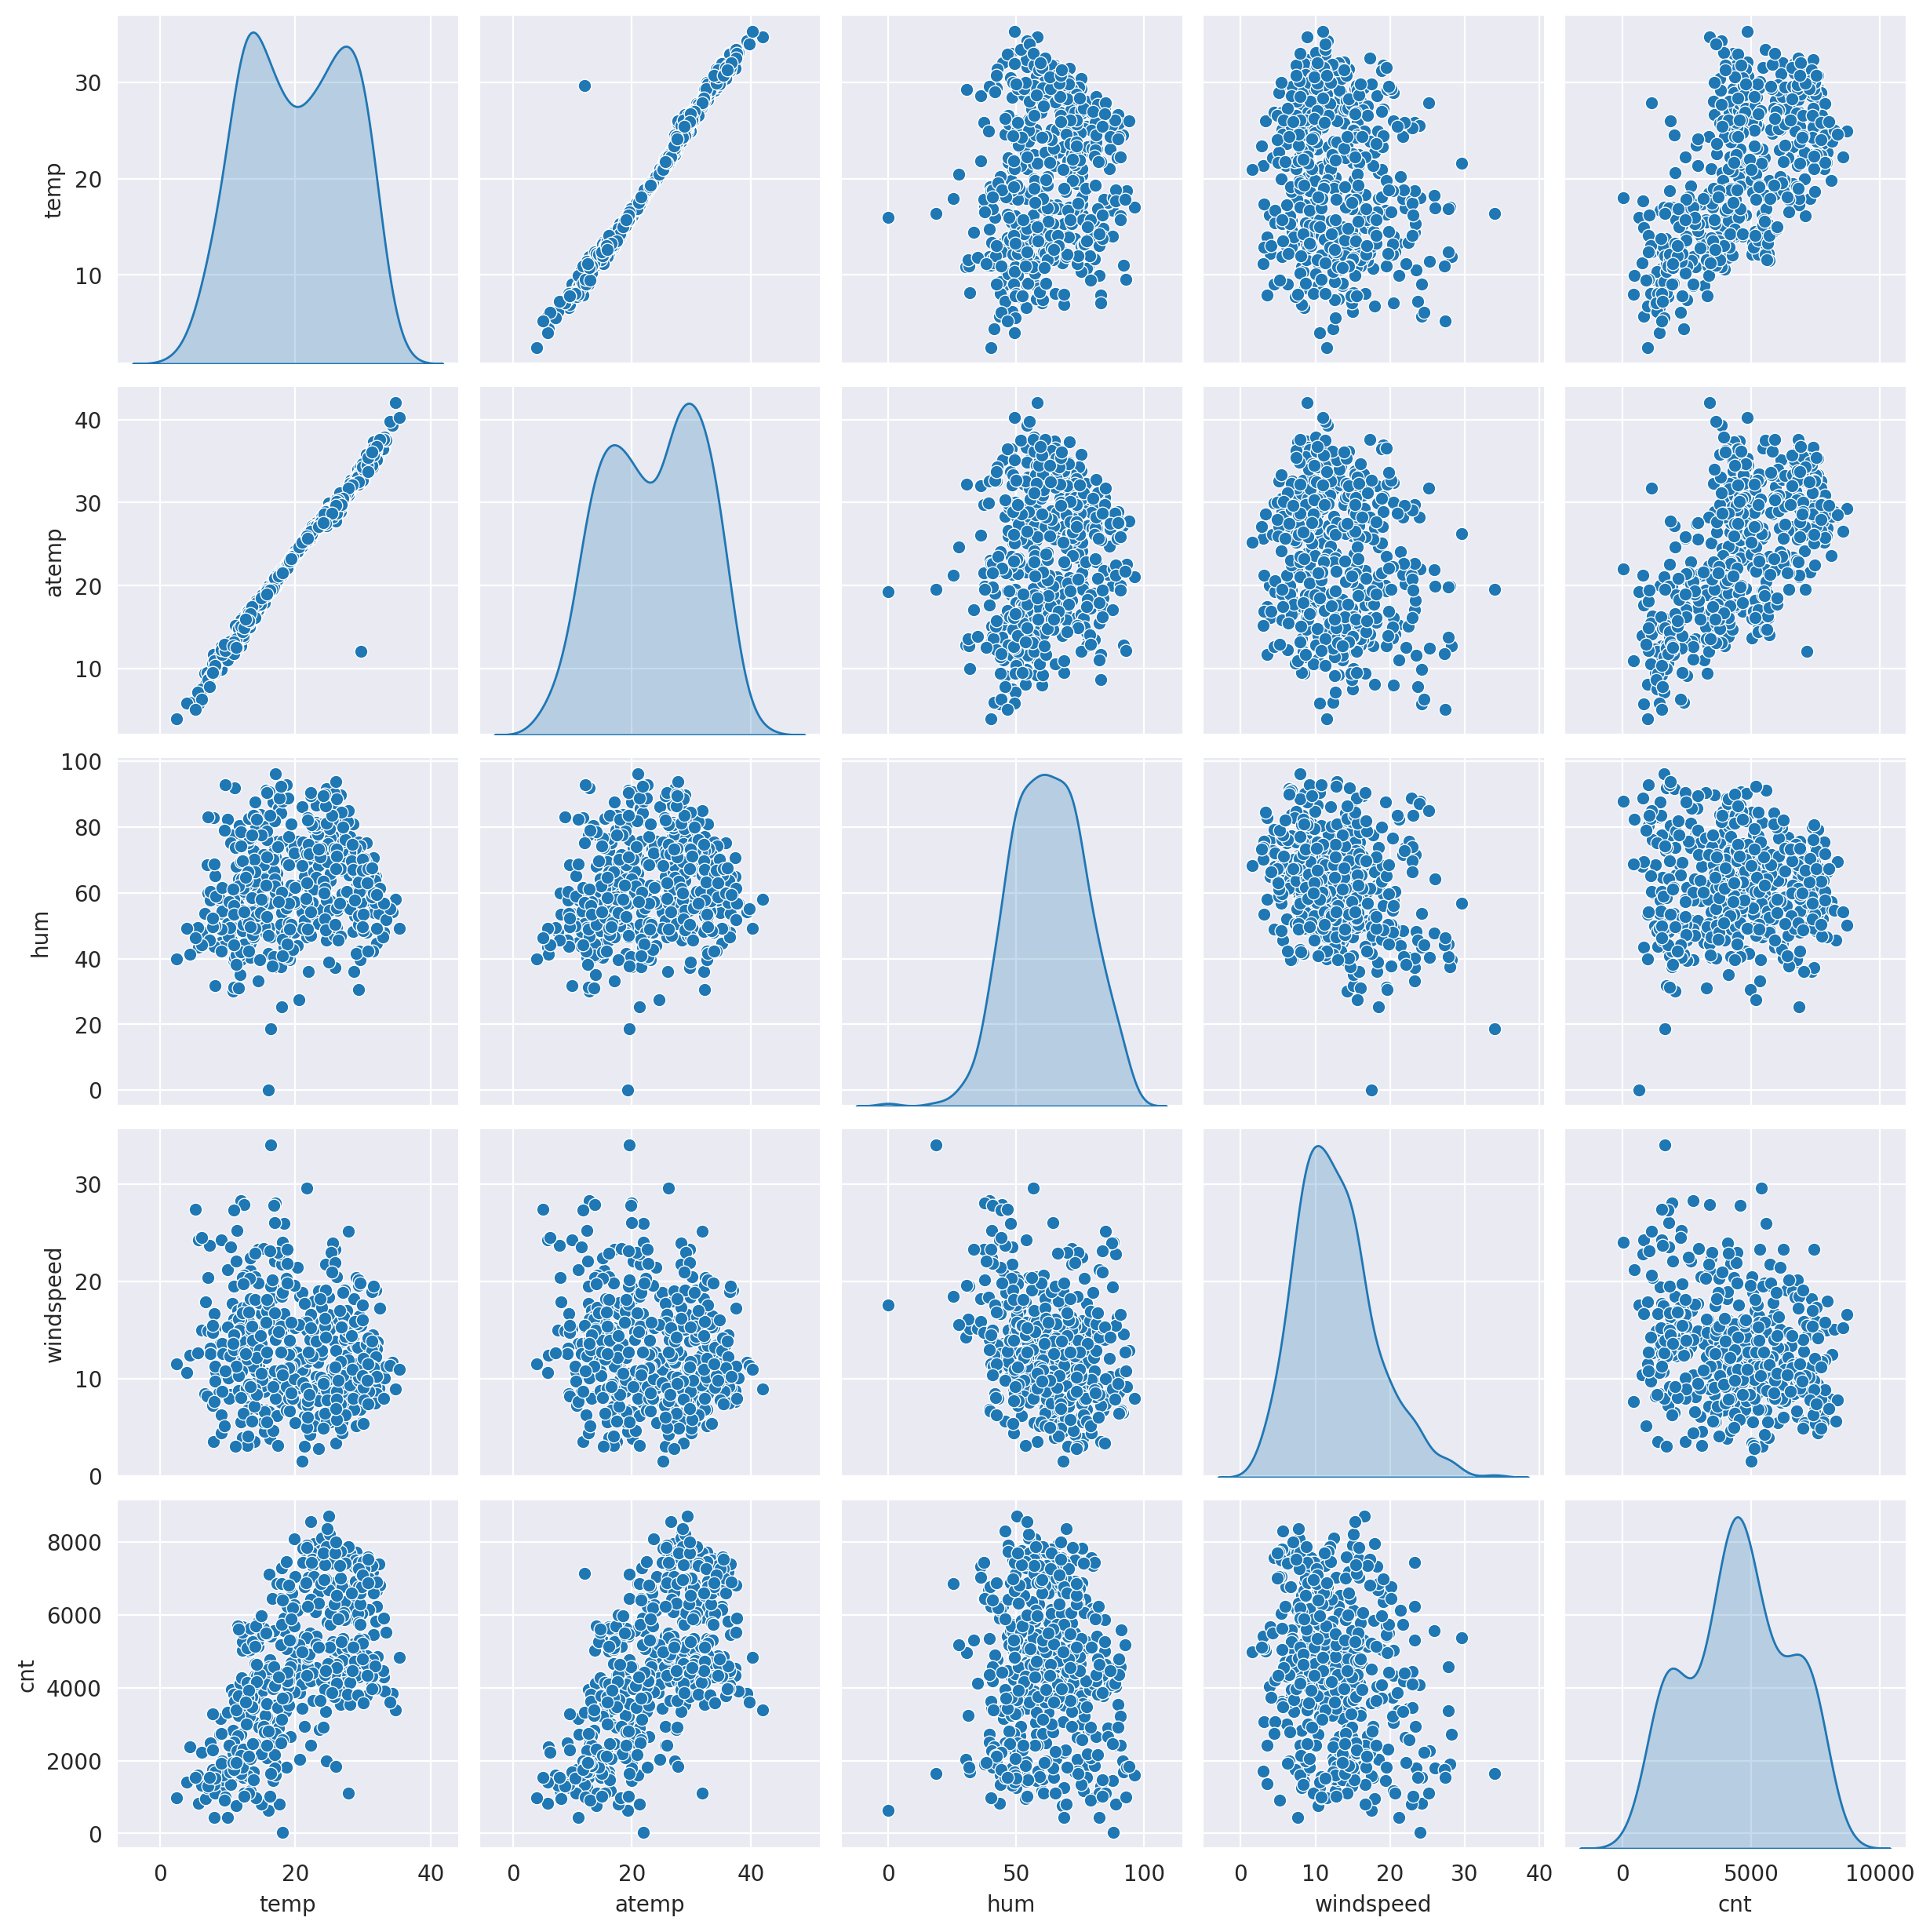

In [ ]:
# Create a new dataframe of only numeric variables:
bike_num = df_train[['temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

=> There is a linear relation between "temp", "atemp" and "cnt".

## Categorical Variables

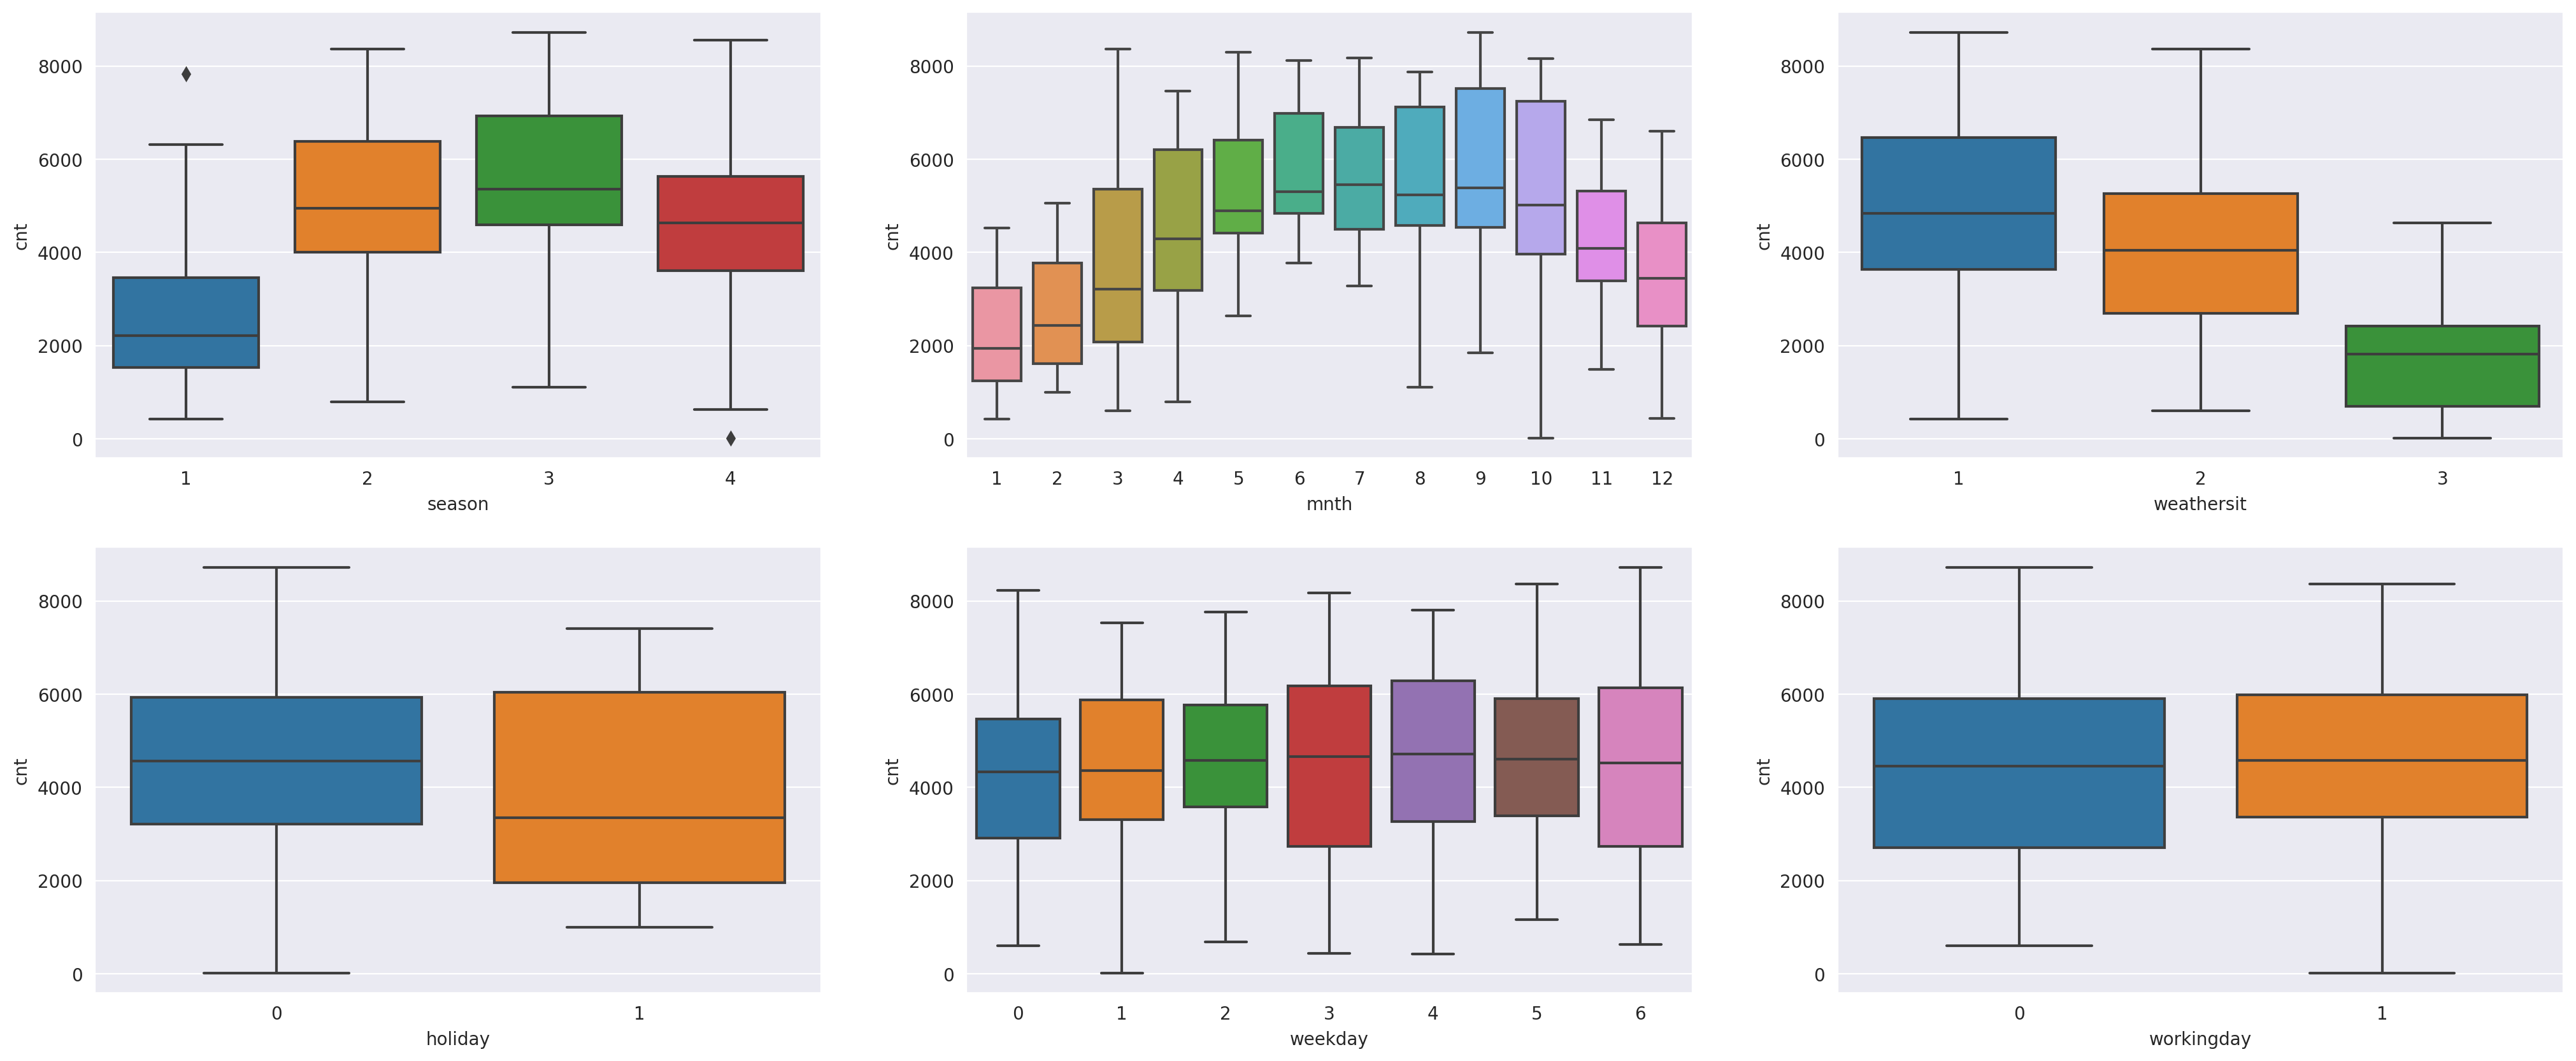

In [ ]:
# boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt'

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

##Correlation Matrix

In [ ]:
#Correlation
bike_new.corr()

temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991696  0.128565  -0.158186  0.627044
atemp      0.991696  1.000000  0.141512  -0.183876  0.630685
hum        0.128565  0.141512  1.000000  -0.248506 -0.098543
windspeed -0.158186 -0.183876 -0.248506   1.000000 -0.235132
cnt        0.627044  0.630685 -0.098543  -0.235132  1.000000

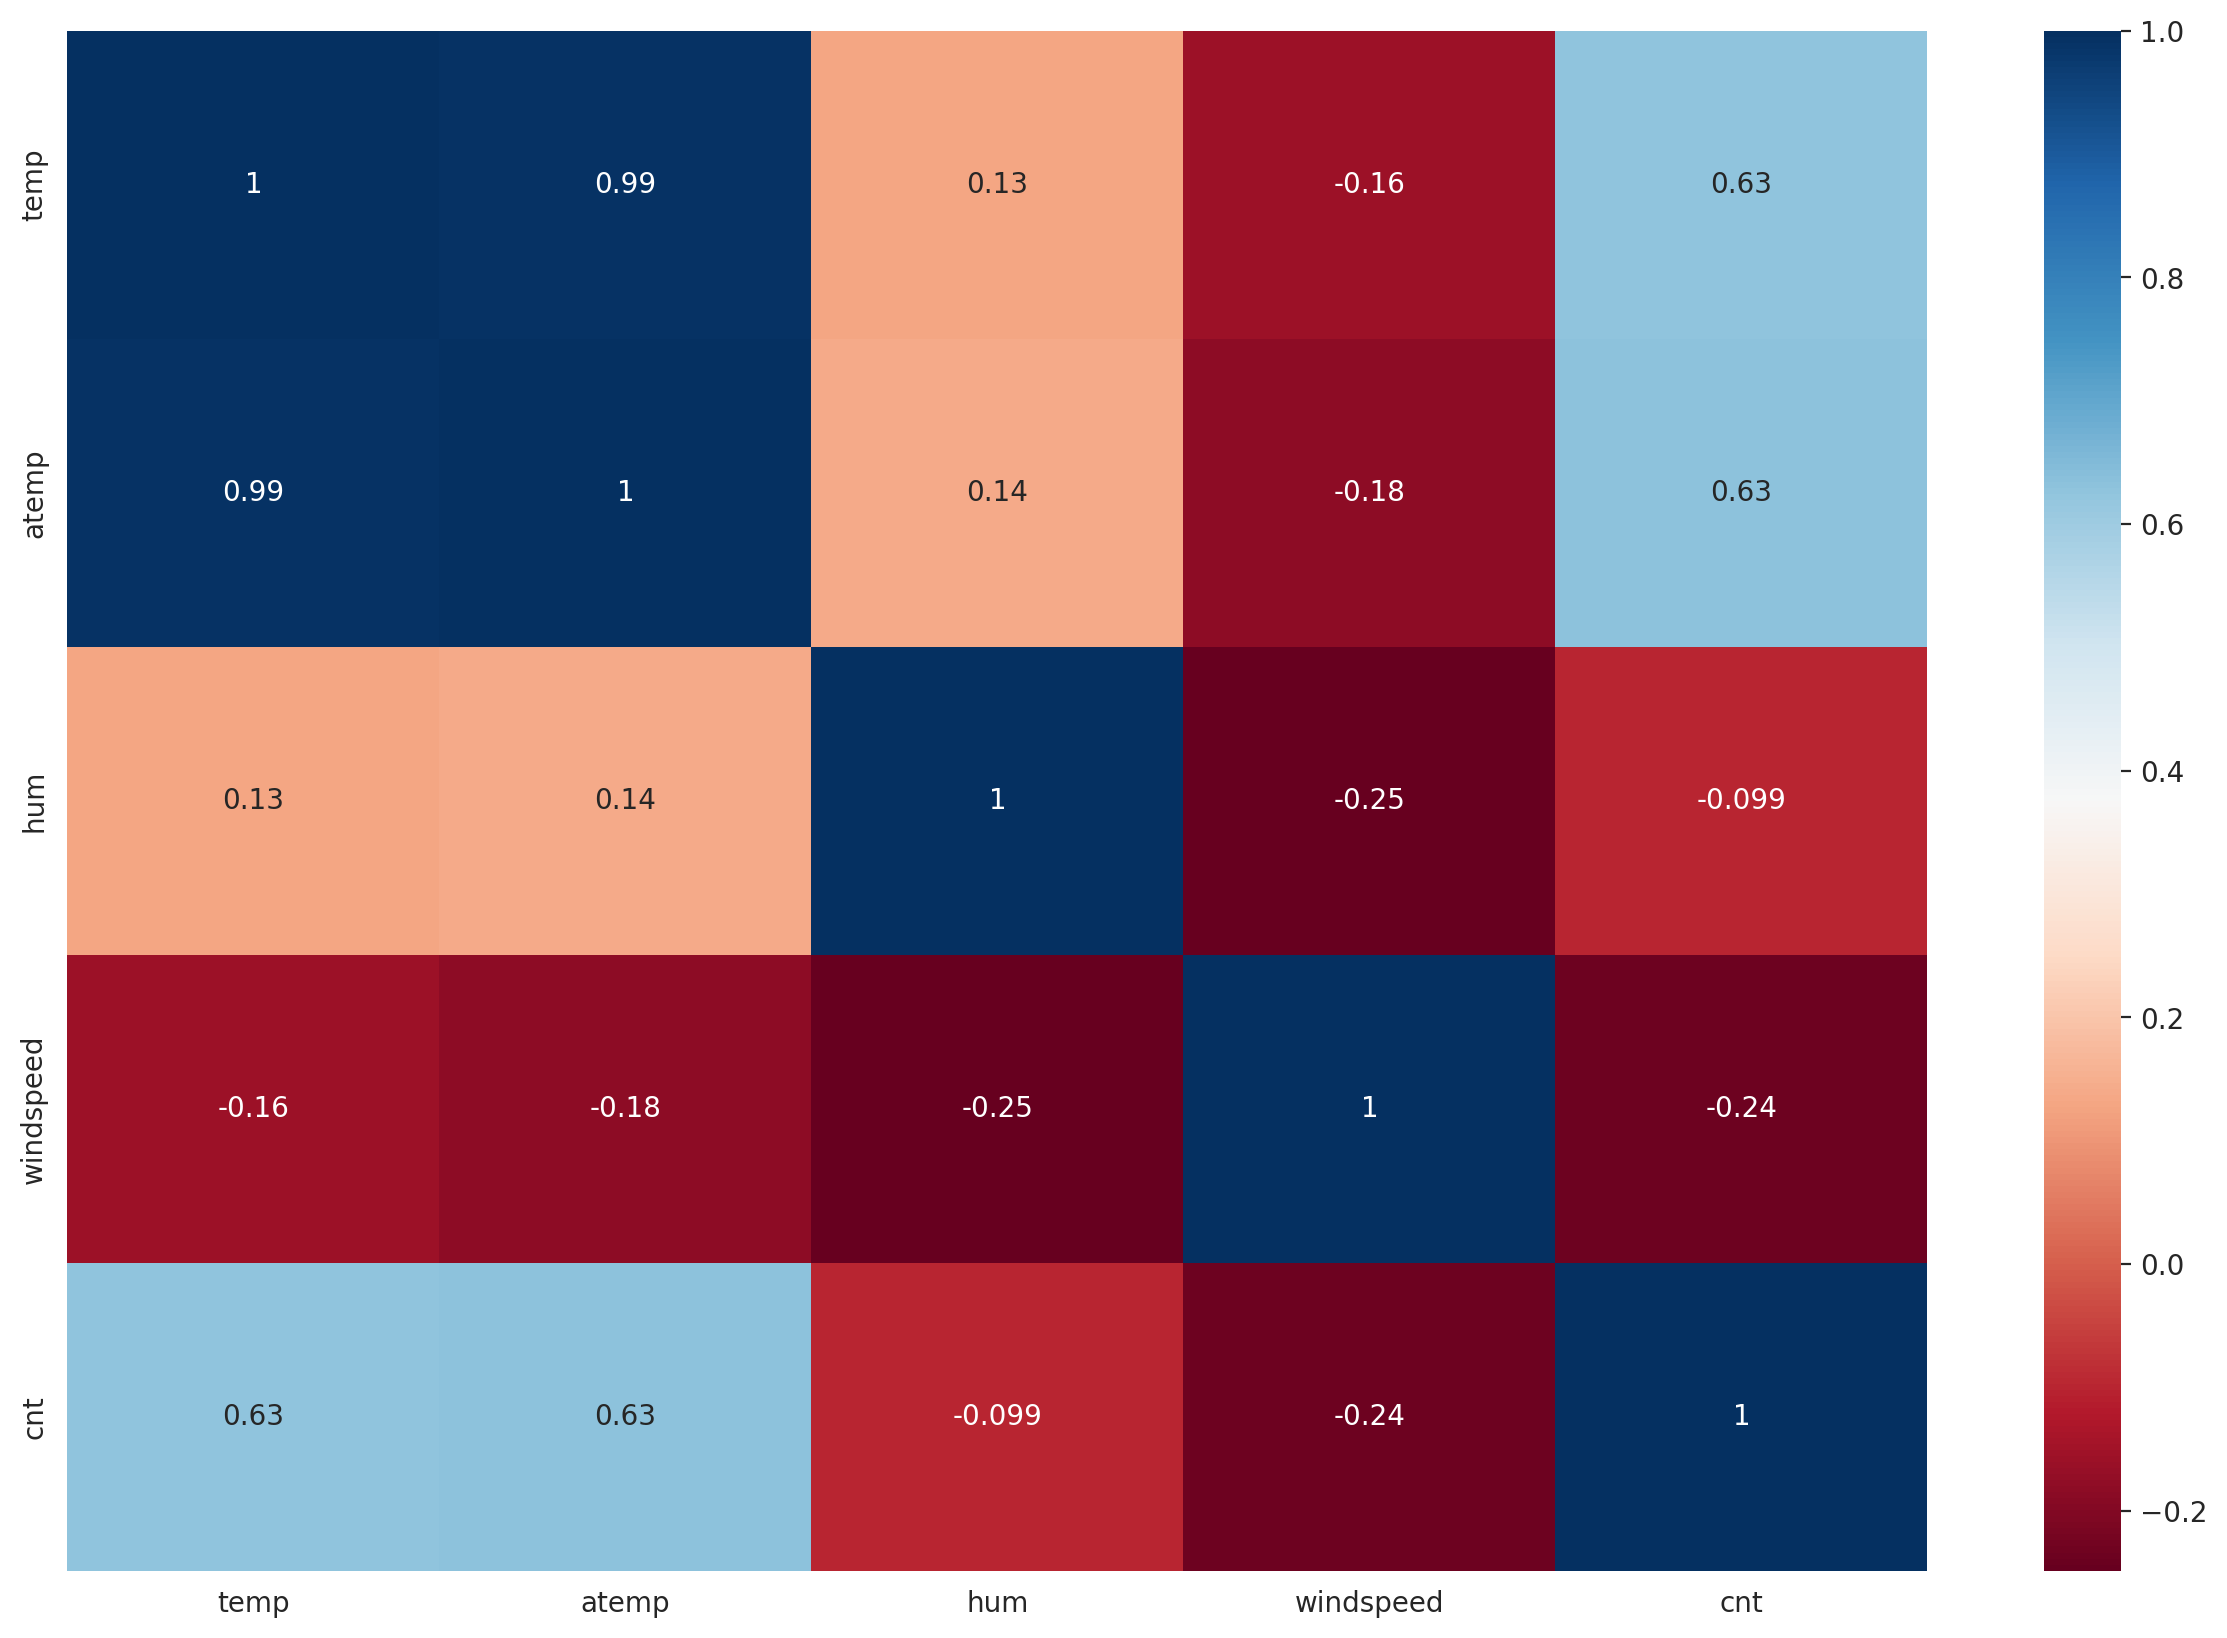

In [ ]:
# 위에서 correlation을 확인하기 어려우니 이를 시각화해 보자.

plt.figure(figsize=(15,10))
sns.heatmap(bike_new.corr(), annot=True, cmap="RdBu")
plt.show()

#Scaling

**스케일 조정이 왜 필요할까?**

> X1은 0 부터 1 사이의 값을 갖고 X2는 1000000 부터 1000000000000 사이의 값을 가진다고 하자. 만약, y의 범위가 1000000 부터 100000000 사이라면 X1 특성은 y를 예측하는데 큰 영향을 주지 못한다고 생각할 수 있다.

데이터 스케일링 과정을 통해 bike sharing에 영향을 주는 독립변수의 범위를 같게 만들어주자.

In [ ]:
#checking the values before scaling
df_train.head(2)

season yr mnth holiday weekday workingday weathersit       temp     atemp  \
483      2  1    4       0       0          0          1  18.791653  22.50605   
650      4  1   10       0       6          0          1  16.126653  19.56980   

         hum  windspeed   cnt  
483  58.7083   7.832836  6304  
650  49.4583   9.791514  7109

In [ ]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

scaler = MinMaxScaler() # 최대/최소값이 각각 1, 0이 되도록 스케일링

#apply scaler to all numeric variables
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
df_train.head(2)

season yr mnth holiday weekday workingday weathersit      temp     atemp  \
483      2  1    4       0       0          0          1  0.497426  0.487055   
650      4  1   10       0       6          0          1  0.416433  0.409971   

          hum  windspeed   cnt  
483  0.609956   0.194850  6304  
650  0.513852   0.255118  7109

In [ ]:
df_train.describe()

temp       atemp         hum   windspeed          cnt
count  510.000000  510.000000  510.000000  510.000000   510.000000
mean     0.540901    0.515631    0.647390    0.346318  4499.627451
std      0.227898    0.213626    0.149722    0.160266  1949.447686
min      0.000000    0.000000    0.000000    0.000000    22.000000
25%      0.343228    0.335807    0.536147    0.230784  3146.500000
50%      0.540519    0.525578    0.646367    0.325635  4510.000000
75%      0.740406    0.692378    0.757900    0.434287  5983.500000
max      1.000000    1.000000    1.000000    1.000000  8714.000000

# Simple Regression

### Fitting simple linear regression model

*Continuous Variable*

In [ ]:
model_sr1 = smf.ols(formula= 'cnt ~ temp', data= df_train)
result_sr1 = model_sr1.fit()
result_sr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     329.4
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           4.11e-57
Time:                        12:50:55   Log-Likelihood:                -4459.1
No. Observations:                 510   AIC:                             8922.
Df Residuals:                     508   BIC:                             8931.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1597.7132    173.477      9.210      0.000    1256.893    1938.534
temp        5364.9604    295.600     18.149      0.000    4784.212    5945.709
==============================================================================
Omnibus:                        9.808   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.565
Skew:                           0.133   Prob(JB):                       0.0375
Kurtosis:                       2.512   Cond. No.                         5.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$Y_{hat} = 1597.71 + 5364.96 temp$

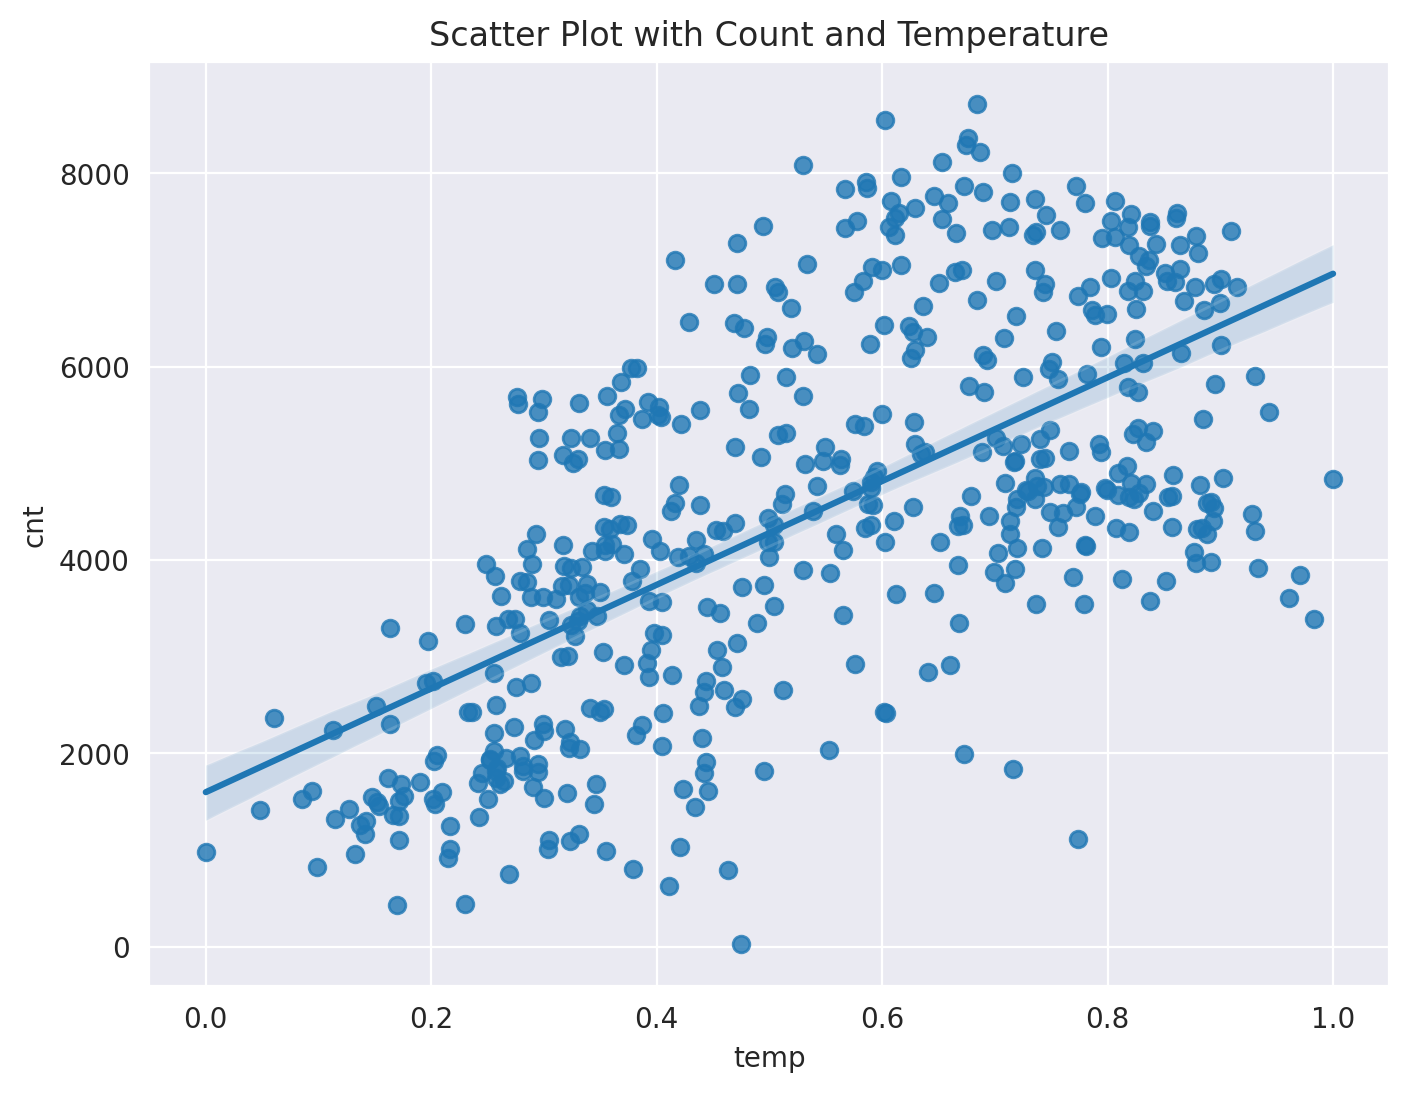

In [ ]:
sns.regplot(x=df_train['temp'], y=df_train['cnt'], fit_reg=True)
plt.title('Scatter Plot with Count and Temperature')
plt.show()

**해석:**

- 모형이 얼마나 설명력을 가지는 가? → (R_squared = 0.393)
- 모형이 통계적으로 유의한지? → F-statistic & (p value = 4.11e-57 < 0.05) *유의한 변수이다*
- 회귀계수가 유의한지? → (p value < 0.05) *유의한 변수이다*

*Categorical Variable*

In [ ]:
# 범주형 변수로 처리안했었다면 C(변수명)/ C(season)

model_sr2 = smf.ols(formula= 'cnt ~ season', data= df_train)
result_sr2 = model_sr2.fit()
result_sr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     90.52
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           6.64e-47
Time:                        12:50:56   Log-Likelihood:                -4477.0
No. Observations:                 510   AIC:                             8962.
Df Residuals:                     506   BIC:                             8979.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2595.2047    139.959     18.543      0.000    2320.232    2870.177
season[T.2]  2266.0969    198.325     11.426      0.000    1876.456    2655.738
season[T.3]  3084.6759    195.330     15.792      0.000    2700.918    3468.434
season[T.4]  2214.4782    199.535     11.098      0.000    1822.459    2606.497
==============================================================================
Omnibus:                        1.174   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.556   Jarque-Bera (JB):                1.216
Skew:                           0.057   Prob(JB):                        0.545
Kurtosis:                       2.789   Cond. No.                         4.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$Y_{hat} = 2595.2047 + 2266.097 season_2 + 3084.68 season_3 + 2214.48 season_4$



**해석:**

- 모형이 얼마나 설명력을 가지는 가? → (R_squared = 0.349)
- 모형이 통계적으로 유의한지? → F-statistic & p value
- 회귀계수가 유의한지? → p value

# Multiple Regression


### Fitting multiple linear regression model



In [ ]:
model_mr1 = smf.ols(formula= 'cnt ~ temp + season', data= df_train) # 온도와 계절 같이
result_mr1 = model_mr1.fit()
result_mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     107.8
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           2.39e-66
Time:                        12:50:56   Log-Likelihood:                -4429.2
No. Observations:                 510   AIC:                             8868.
Df Residuals:                     505   BIC:                             8889.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1074.4375    196.097      5.479      0.000     689.171    1459.704
season[T.2]   721.4045    235.702      3.061      0.002     258.326    1184.483
season[T.3]   474.5936    311.509      1.524      0.128    -137.419    1086.607
season[T.4]  1420.3602    197.778      7.182      0.000    1031.790    1808.930
temp         5139.0259    503.325     10.210      0.000    4150.157    6127.895
==============================================================================
Omnibus:                        1.868   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.393   Jarque-Bera (JB):                1.678
Skew:                          -0.023   Prob(JB):                        0.432
Kurtosis:                       2.723   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$Y_{hat} = 1074.44 + 721.4 temp + 474.6 season_2 + 1420.36 season_3 + 5139.03 season_4$

- Adj. R-squared: 0.456
- 단순선형회귀 때와 달리 season_3의 p-value가 0.05보다 크다.

Why? season_3와 temp의 correlation이 커서 생길 수 있는 현상

In [ ]:
season = pd.get_dummies(df_train['season'], drop_first=True)
season['temp'] = df_train['temp']
season['1'] = 0
season.loc[df_train['season'] == 1, '1'] = 1

In [ ]:
season.corr()

2         3         4      temp         1
2     1.000000 -0.341962 -0.322936  0.139899 -0.329854
3    -0.341962  1.000000 -0.336555  0.689389 -0.343764
4    -0.322936 -0.336555  1.000000 -0.223969 -0.324638
temp  0.139899  0.689389 -0.223969  1.000000 -0.619600
1    -0.329854 -0.343764 -0.324638 -0.619600  1.000000

In [ ]:
# 전체 독립변수를 사용하는 것이 좋을까?

model_mr2 = smf.ols(formula= 'cnt ~ season + yr + mnth + holiday + weekday + workingday + weathersit + temp + atemp + hum + windspeed', data= df_train)
result_mr2 = model_mr2.fit()
result_mr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     94.71
Date:                Wed, 01 Nov 2023   Prob (F-statistic):          4.67e-176
Time:                        12:50:56   Log-Likelihood:                -4108.7
No. Observations:                 510   AIC:                             8275.
Df Residuals:                     481   BIC:                             8398.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1714.1854    273.923      6.258      0.000    1175.951    2252.420
season[T.2]       887.3233    231.121      3.839      0.000     433.191    1341.455
season[T.3]       787.4839    267.606      2.943      0.003     261.663    1313.305
season[T.4]      1556.2114    228.407      6.813      0.000    1107.413    2005.010
yr[T.1]          1999.1670     71.365     28.013      0.000    1858.941    2139.393
mnth[T.2]         136.2995    173.646      0.785      0.433    -204.900     477.499
mnth[T.3]         584.2126    201.740      2.896      0.004     187.811     980.614
mnth[T.4]         323.2333    307.807      1.050      0.294    -281.579     928.045
mnth[T.5]         564.4427    334.655      1.687      0.092     -93.124    1222.010
mnth[T.6]         368.8924    349.745      1.055      0.292    -318.324    1056.109
mnth[T.7]           6.0828    387.509      0.016      0.987    -755.337     767.502
mnth[T.8]         252.9367    371.637      0.681      0.496    -477.296     983.169
mnth[T.9]         932.3124    327.692      2.845      0.005     288.427    1576.198
mnth[T.10]        396.0395    302.116      1.311      0.191    -197.590     989.669
mnth[T.11]       -190.1585    286.094     -0.665      0.507    -752.307     371.990
mnth[T.12]       -112.5752    227.306     -0.495      0.621    -559.211     334.061
holiday[T.1]       19.1929    215.610      0.089      0.929    -404.461     442.847
weekday[T.1]     -144.6681     89.362     -1.619      0.106    -320.256      30.920
weekday[T.2]       27.6226     97.562      0.283      0.777    -164.078     219.323
weekday[T.3]      147.0785     94.202      1.561      0.119     -38.020     332.177
weekday[T.4]      111.5867     98.906      1.128      0.260     -82.754     305.928
weekday[T.5]      154.8838     96.048      1.613      0.107     -33.841     343.609
weekday[T.6]      467.6446    129.153      3.621      0.000     213.872     721.417
workingday[T.1]   277.3108     83.241      3.331      0.001     113.750     440.871
weathersit[T.2]  -431.3003     93.457     -4.615      0.000    -614.935    -247.666
weathersit[T.3] -2347.7467    250.092     -9.388      0.000   -2839.154   -1856.339
temp             3063.0758   1236.624      2.477      0.014     633.223    5492.928
atemp             896.5084   1214.281      0.738      0.461   -1489.442    3282.459
hum             -1490.9145    337.177     -4.422      0.000   -2153.437    -828.392
windspeed       -1568.1324    247.600     -6.333      0.000   -2054.644   -1081.621
==============================================================================
Omnibus:                       89.783   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.469
Skew:                          -0.880   Prob(JB):                     5.46

독립변수 여러 개 사용할 때는 독립변수간 상관관계로 발생하는 **다중공선성** 을 고려해야한다.

In [ ]:
# VIF 출력을 위한 데이터 프레임 형성
vif = pd.DataFrame()
X = df_train.drop(labels = 'cnt', axis = 1)

# VIF 값과 각 Feature 이름에 대해 설정
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

# VIF 값이 높은 순으로 정렬
vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

VIF Factor    features
0   344.760217       atemp
1   332.105453        temp
2    25.051788         hum
3    21.474854      season
4    15.762107        mnth
5    12.798258  weathersit
6     4.495259   windspeed
7     3.169557  workingday
8     3.089271     weekday
9     1.989968          yr
10    1.087778     holiday

In [ ]:
# 체감온도 & 온도 중 atemp 제외.

vif = pd.DataFrame()
X_1 = X.drop(labels = 'atemp', axis = 1)

vif["VIF Factor"] = [variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["features"] = X_1.columns

vif = vif.sort_values(by="VIF Factor", ascending=False)
vif = vif.reset_index().drop(columns='index')
vif

VIF Factor    features
0   24.398982         hum
1   21.402076      season
2   15.748535        mnth
3   12.768576  weathersit
4    7.801801        temp
5    4.412788   windspeed
6    3.169175  workingday
7    3.089073     weekday
8    1.988217          yr
9    1.087329     holiday

VIF 높은 atemp, model2에서 p-value가 높았던 holiday 제외

**최종모델**
- 독립변수: 계절, 년도, 월, 요일, 날씨유형, 기온, 습도, 풍속

In [ ]:
model_mr3 = smf.ols(formula= 'cnt ~ season + yr + mnth + weekday + workingday+ weathersit + temp + hum + windspeed' , data= df_train)
result_mr3 = model_mr3.fit()
result_mr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     98.29
Date:                Wed, 01 Nov 2023   Prob (F-statistic):          6.10e-177
Time:                        12:50:56   Log-Likelihood:                -4109.0
No. Observations:                 510   AIC:                             8274.
Df Residuals:                     482   BIC:                             8393.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1724.6776    273.425      6.308      0.000    1187.425    2261.931
season[T.2]       888.9592    231.001      3.848      0.000     435.065    1342.853
season[T.3]       783.1760    267.416      2.929      0.004     257.731    1308.621
season[T.4]      1562.0723    228.161      6.846      0.000    1113.759    2010.386
yr[T.1]          1998.5613     71.327     28.020      0.000    1858.412    2138.711
mnth[T.2]         141.2246    173.436      0.814      0.416    -199.560     482.009
mnth[T.3]         586.7441    201.616      2.910      0.004     190.589     982.899
mnth[T.4]         329.1132    307.558      1.070      0.285    -275.208     933.434
mnth[T.5]         558.1719    334.390      1.669      0.096     -98.869    1215.213
mnth[T.6]         356.2910    349.163      1.020      0.308    -329.779    1042.361
mnth[T.7]          -6.4421    386.955     -0.017      0.987    -766.769     753.884
mnth[T.8]         229.4766    370.101      0.620      0.536    -497.734     956.688
mnth[T.9]         920.2515    327.131      2.813      0.005     277.473    1563.030
mnth[T.10]        393.6068    301.955      1.304      0.193    -199.704     986.918
mnth[T.11]       -190.2914    285.959     -0.665      0.506    -752.172     371.589
mnth[T.12]       -110.3770    227.180     -0.486      0.627    -556.762     336.008
weekday[T.1]     -132.2998    249.900     -0.529      0.597    -623.328     358.729
weekday[T.2]       37.2815    276.707      0.135      0.893    -506.420     580.983
weekday[T.3]      155.2177    272.610      0.569      0.569    -380.433     690.869
weekday[T.4]      121.3153    274.459      0.442      0.659    -417.968     660.599
weekday[T.5]      157.8255    273.726      0.577      0.564    -380.019     695.670
weekday[T.6]      467.7799    129.091      3.624      0.000     214.128     721.431
workingday[T.1]   267.7241    242.766      1.103      0.271    -209.287     744.735
weathersit[T.2]  -432.5572     93.397     -4.631      0.000    -616.074    -249.041
weathersit[T.3] -2354.3868    249.812     -9.425      0.000   -2845.242   -1863.531
temp             3926.8848    400.260      9.811      0.000    3140.415    4713.355
hum             -1485.3420    336.934     -4.408      0.000   -2147.382    -823.301
windspeed       -1606.1402    242.075     -6.635      0.000   -2081.793   -1130.487
==============================================================================
Omnibus:                       88.510   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.772
Skew:                          -0.870   Prob(JB):                     5.71e-50
Kurtosis:                       5.765   Cond. No.                         45.8
==============================================================================

Note

### Model Assessment

Text(0, 0.5, 'Residual')

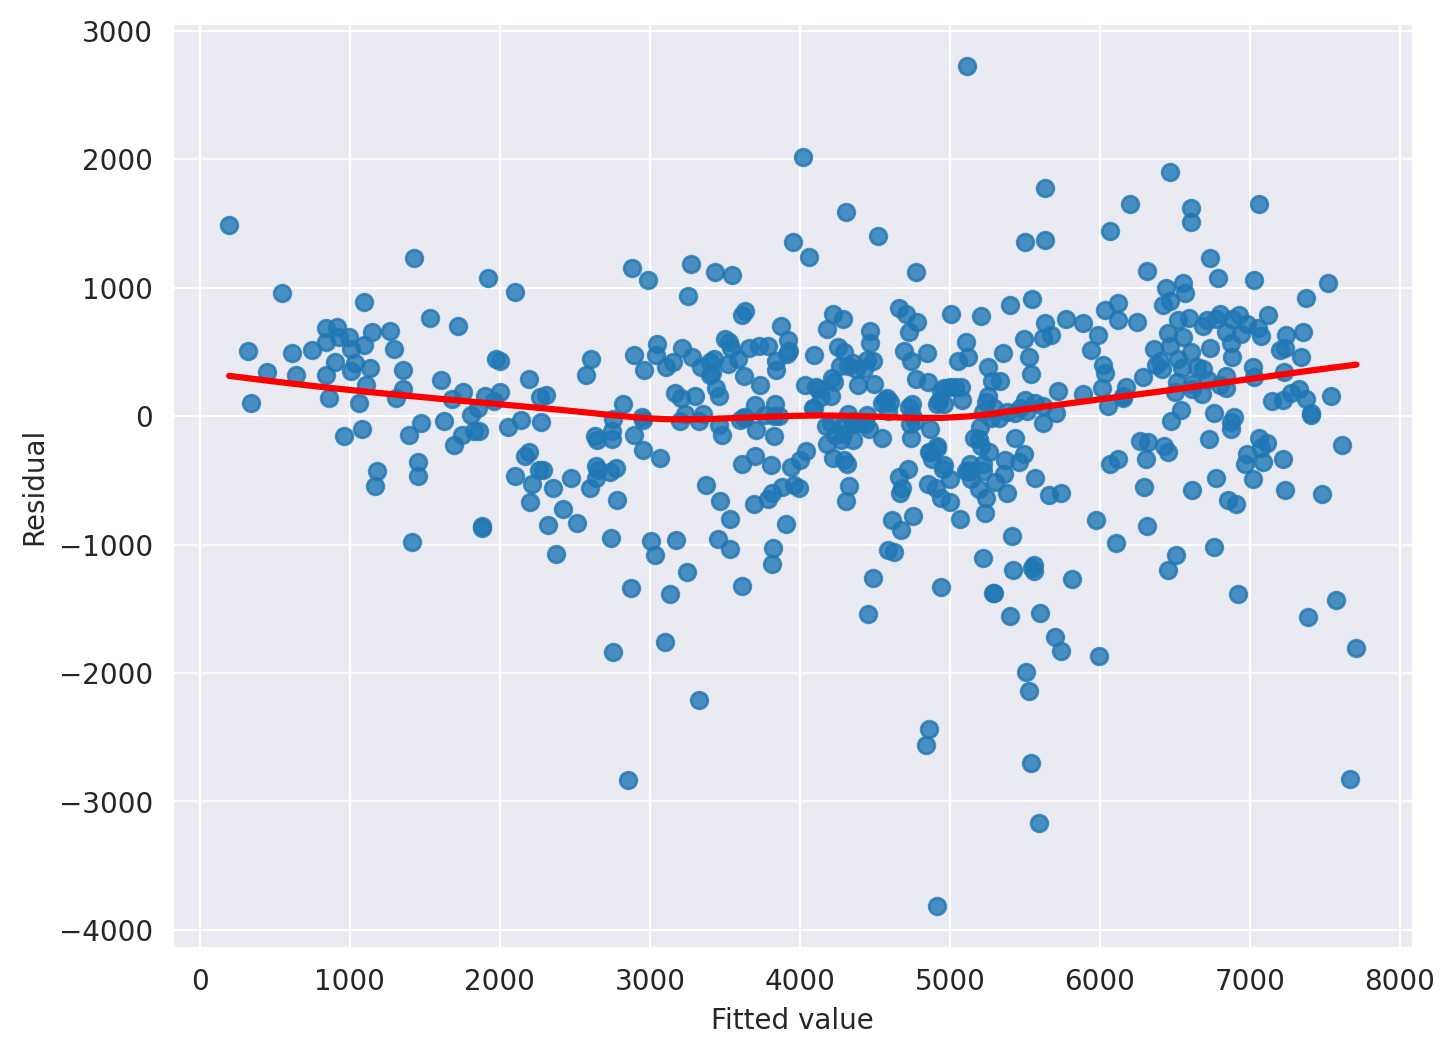

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (8,6)

fig, ax = plt.subplots(1,1)
#lowess=True: 로컬 가중 평균 스무딩(LOESS) 적용
sns.regplot(x= result_mr3.fittedvalues, y= result_mr3.resid, lowess= True, line_kws = {'color':'red'})
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')

**선형성** : 독립변수와 종속변수 간의 분포관계가 선형관계를 가진다.

- 빨간 실선: 잔차의 추세
- 비교적 수평선 형태를 보이기에 선형성을 만족한다고 할 수 있다.

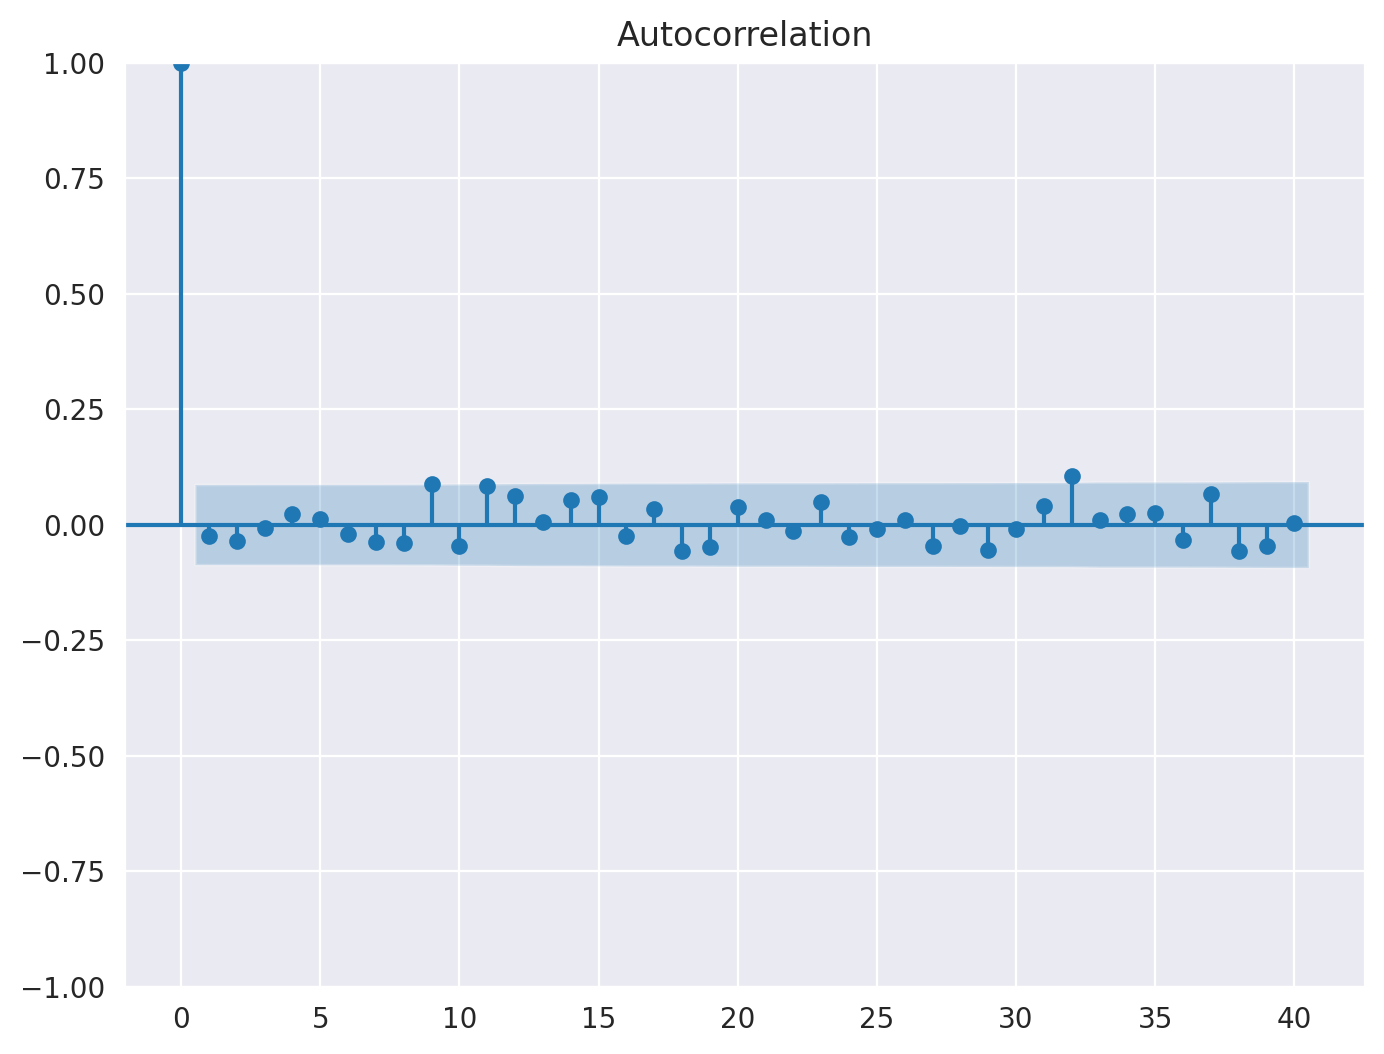

In [ ]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(result_mr3.resid, lags=40 , alpha=0.05)
acf.show()

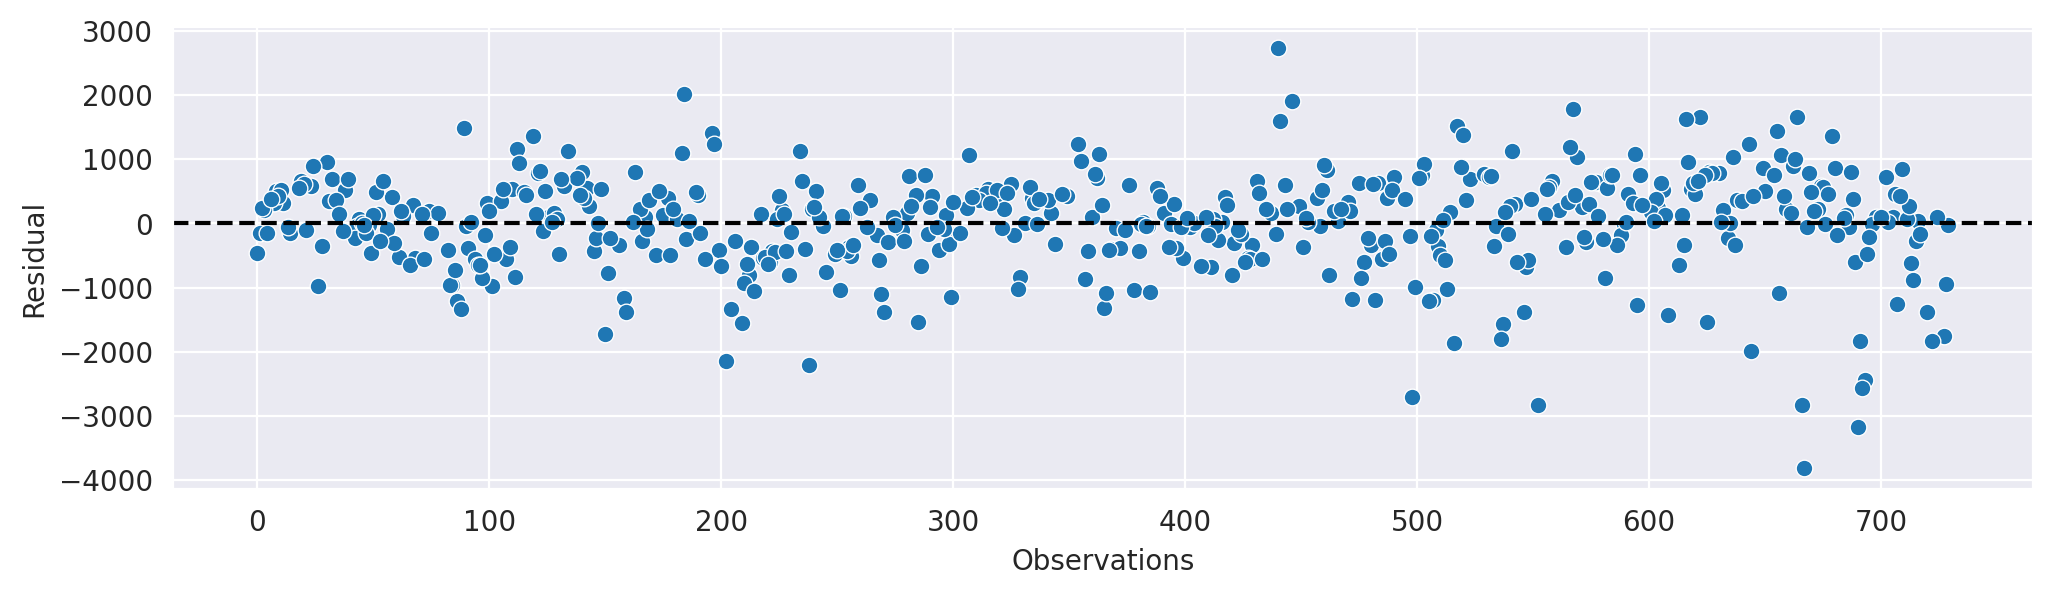

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(12,3))
sns.scatterplot(x= df_train.index, y= result_mr3.resid)
ax.set_xlabel('Observations')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

**독립성**

> 첫 번째 그래프: x 축은 observation 간격 (시차), y 축은 자기상관계수

자신과 x 간격에 있는 값과의 자기상관계수를 그래프로 나타냄. 시차 0에서는 자신을 사용해 구한 자기상관계수이기에 1이 나올 수 밖에 없다. 0 시차 이후 파란색 범위를 넘어서면 autocorrelation이 있다고 판단한다.

> 두 번째 그래프: x 축은 observation, y 축은 잔차

이 경우에는 특정 패턴을 보이면 autocorrelation이 있다고 판단한다.

Text(0, 0.5, 'Standard Residual')

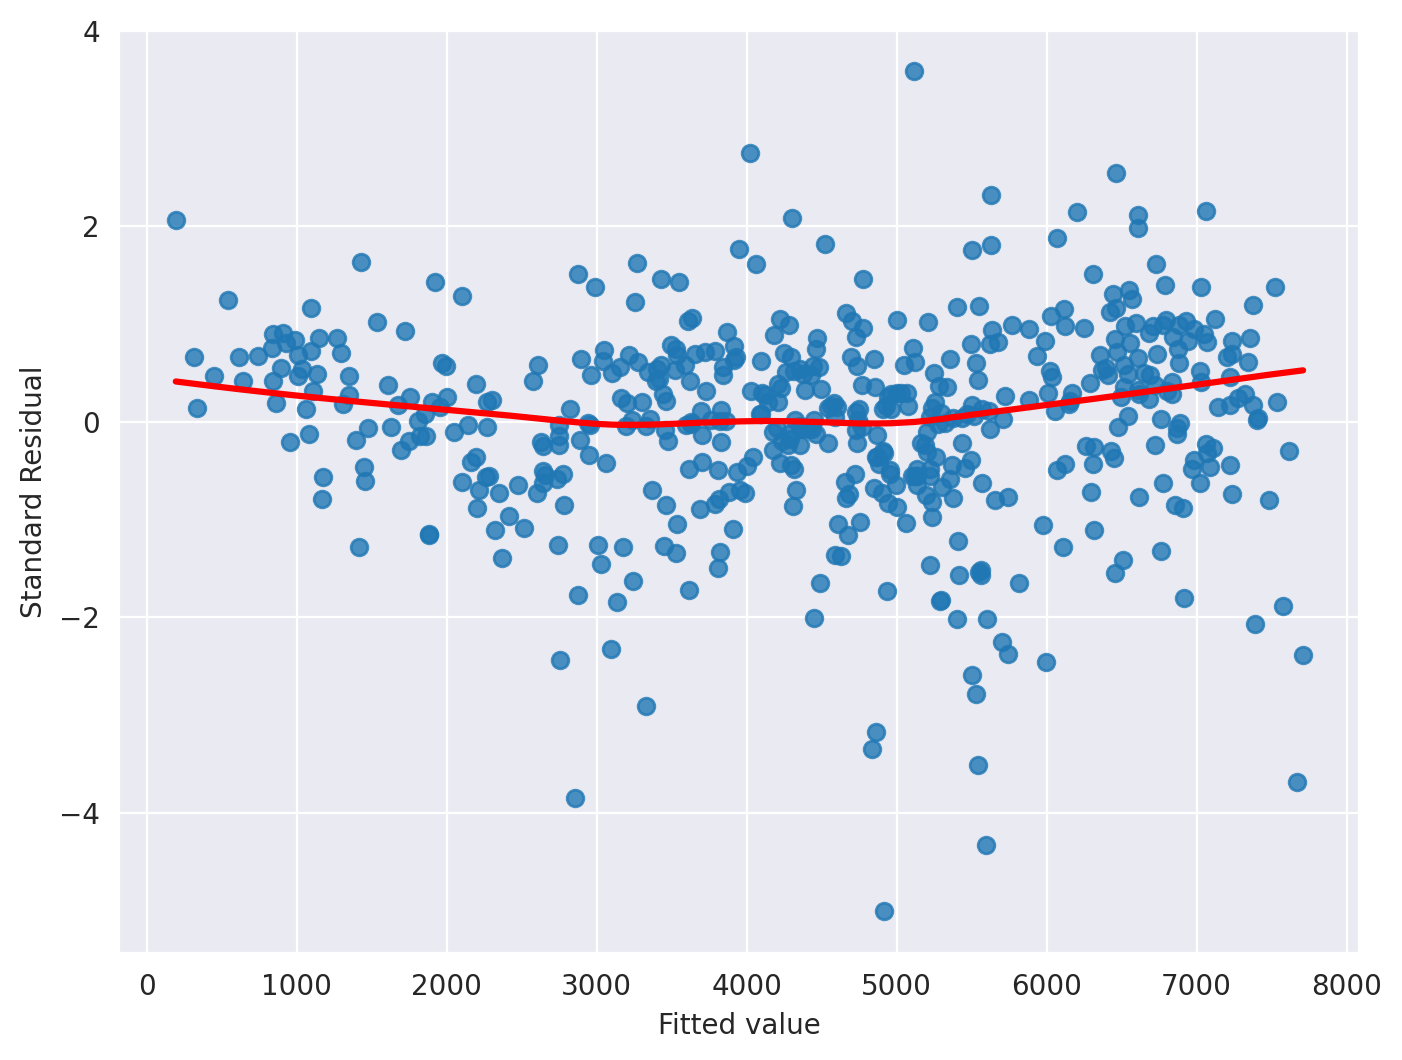

In [ ]:
#영향도 정보 추출
infl = result_mr3.get_influence()
#내부 표준화된 잔차
standardized_residuals = infl.resid_studentized_internal

fig, ax = plt.subplots(1,1)
sns.regplot(x= result_mr3.fittedvalues, y= standardized_residuals, lowess= True, line_kws = {'color':'red'})
ax.set_xlabel('Fitted value')
ax.set_ylabel('Standard Residual')

**등분산성**: 예측된 값에 상관없이, 모든 값들에 대해 잔차의 분산이 동일하다.

- 빨간 실선을 기준으로 잔차가 고르게 분포하는가?

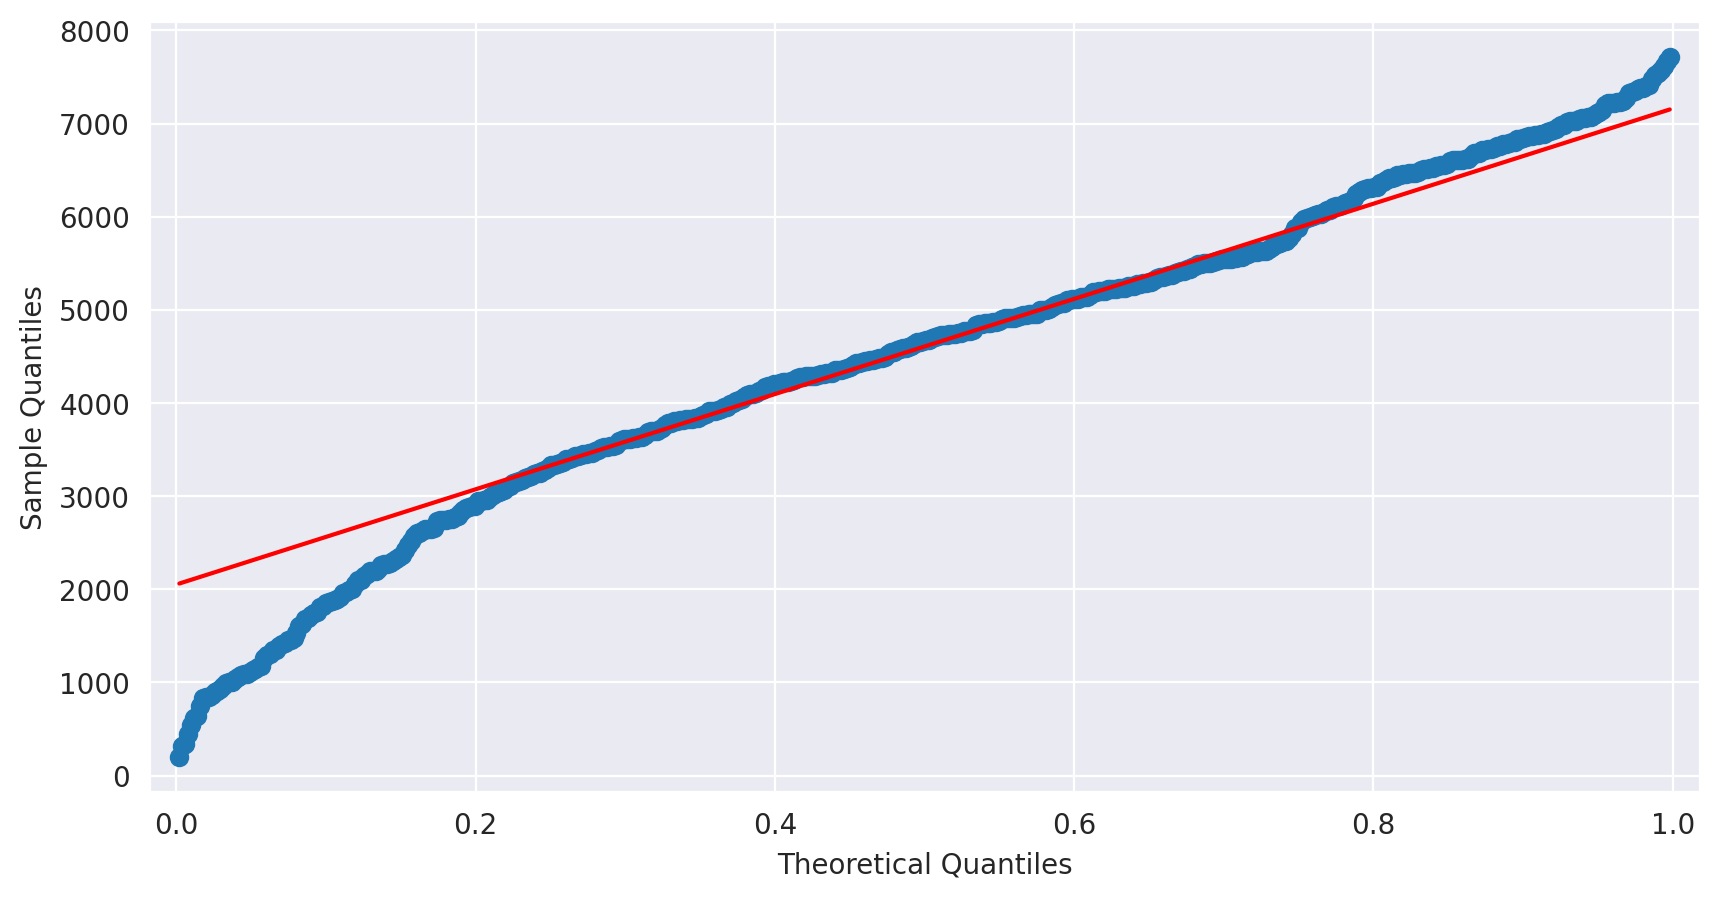

In [ ]:
import scipy.stats as stats

fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 1 ,1)
sm.qqplot(result_mr3.fittedvalues, line ='q', dist= stats.uniform, ax=ax)
plt.show()

**정규성**: 잔차가 정규분포를 따른다.

- 분위수가 작을 때, 정규분포를 만족하지 않음 (left skewness)
- 잔차 plot에서 이상치가 존재함을 알 수 있기에 이를 제거해보자.

### Transformation

- 선형성 위배 (주로 독립변수 변환)

In [ ]:
# import numpy as np
# formula = "Y 변수명 ~ x1 + np.sqrt(x2) + np.log(x3) + np.power(x4, 2)"

# transformed_model = smf.ols(formula, data=df)
# transformed_modelfit = transformed_model.fit()
# transformed_modelfit.summary()

- 등분산성 위배 (주로 종속변수 변환)

In [ ]:
# import numpy as np
# formula = "np.log(Y) ~ x1 + x2 + x3 ~~"

# transformed_model = smf.ols(formula, data=df)
# transformed_modelfit = transformed_model.fit()
# transformed_modelfit.summary()

In [ ]:
# formula = "np.sqrt(cnt) ~ season + yr + mnth + weekday + workingday + weathersit + temp + hum + windspeed"

formula = "np.log(cnt) ~ season + yr + mnth + weekday + workingday + weathersit + temp + hum + windspeed"

transformed_model = smf.ols(formula, data= df_train)
transformed_modelfit = transformed_model.fit()

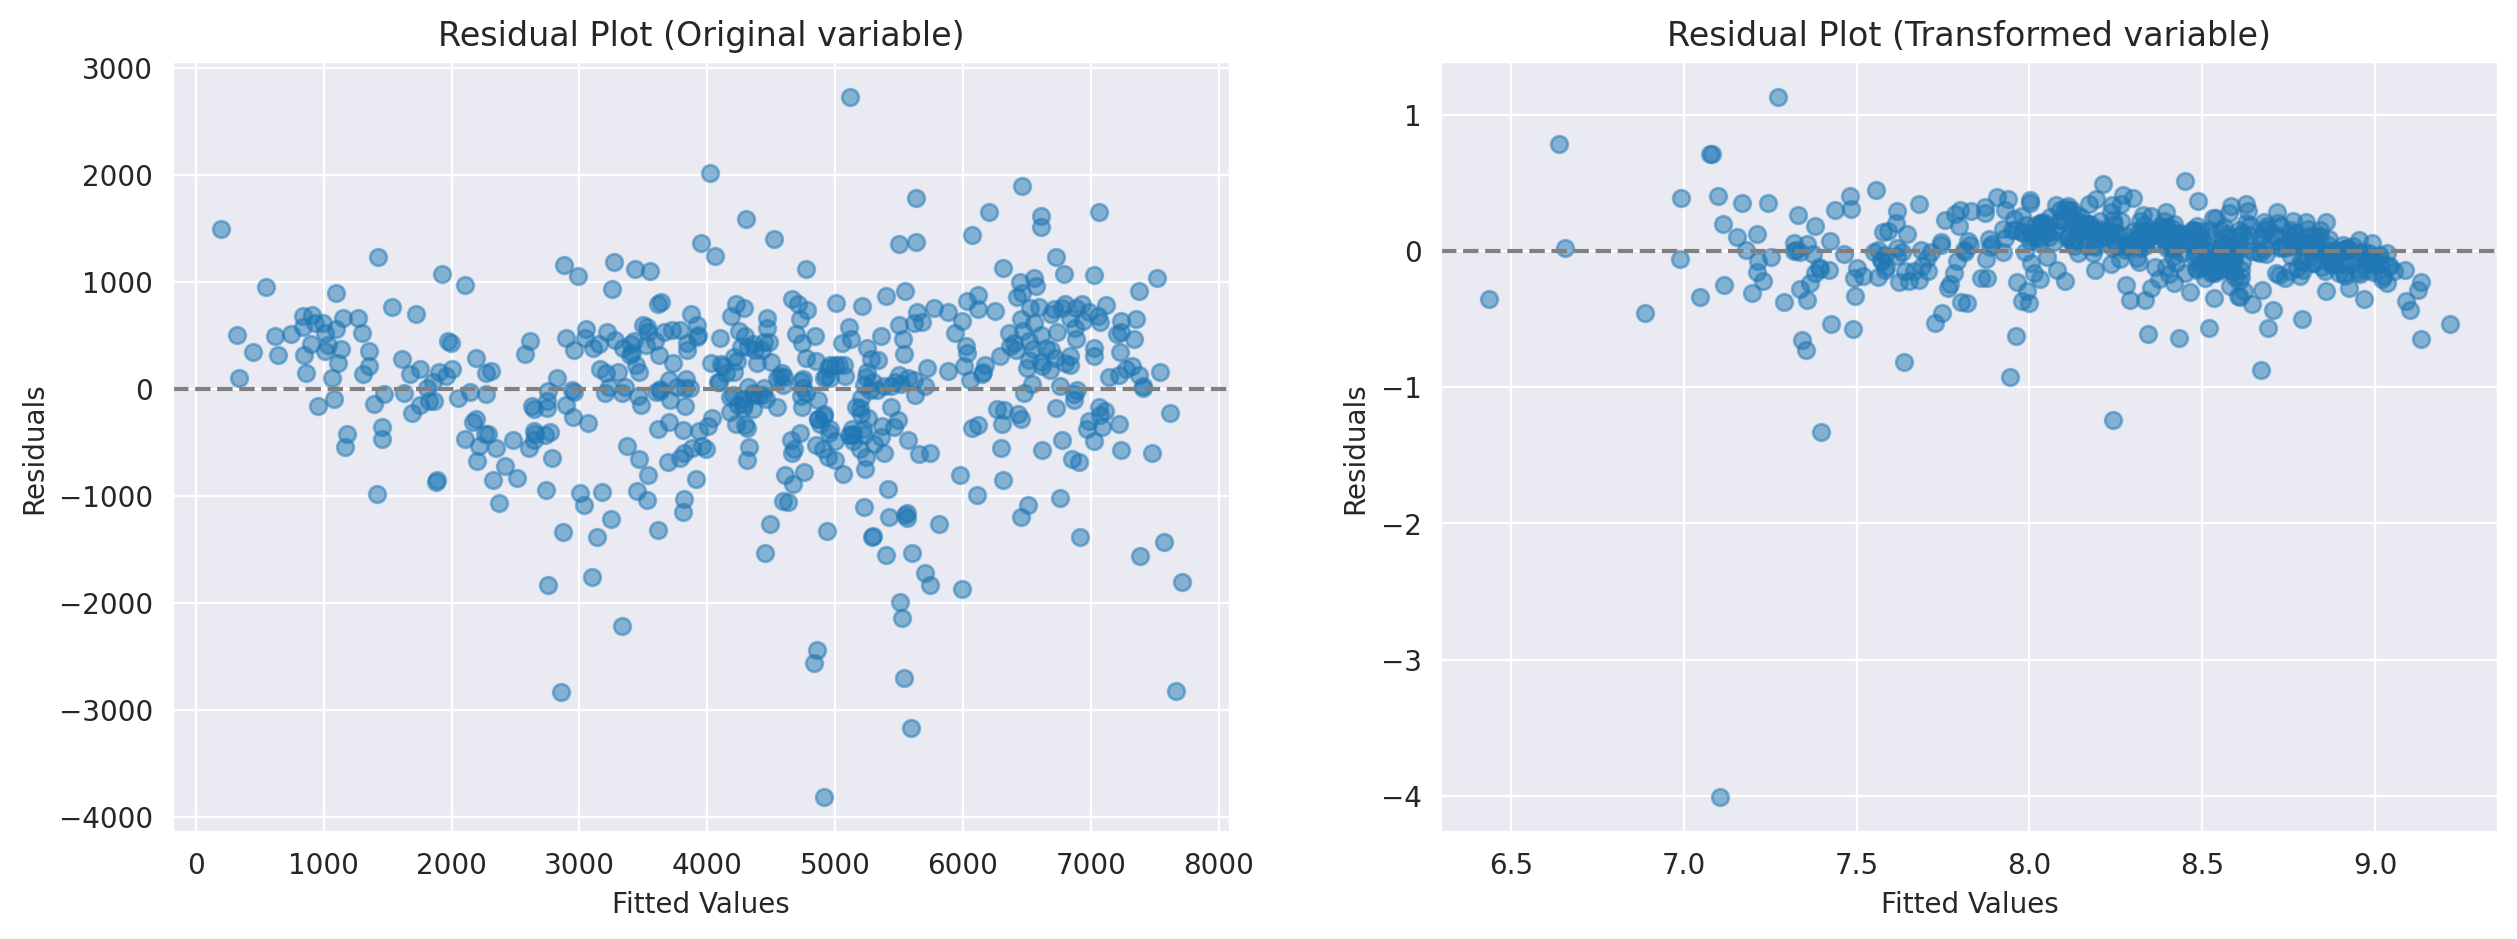

In [ ]:
residual = result_mr3.resid # original (mr3)
fitted_value = result_mr3.fittedvalues

residual2 = transformed_modelfit.resid # transformation (mr3)
fitted_value2 = transformed_modelfit.fittedvalues

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Residual Plot (original variables)
axs[0].scatter(x=fitted_value, y=residual, alpha=0.5)
axs[0].axhline(y=0, color="grey", linestyle="dashed")
axs[0].set_xlabel("Fitted Values")
axs[0].set_ylabel("Residuals")
axs[0].set_title("Residual Plot (Original variable)")

# Residual Plot (transformed variables)
axs[1].scatter(x=fitted_value2, y=residual2, alpha=0.5)
axs[1].axhline(y=0, color="grey", linestyle="dashed")
axs[1].set_xlabel("Fitted Values")
axs[1].set_ylabel("Residuals")
axs[1].set_title("Residual Plot (Transformed variable)")

plt.show()

# Test Model

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
X_final = df_test[['season', 'yr', 'mnth', 'weekday','workingday', 'weathersit', 'temp', 'hum', 'windspeed']]
y_final = df_test['cnt']

In [ ]:
y_pred = result_mr3.predict(X_final)

In [ ]:
# R_squared

r2_score(y_final, y_pred)

0.8241468952048396

In [ ]:
# train으로 model fit하고, predict하면 당연히 r2 score가 높을 수 밖에 (overestimate)

X_final1 = df_train[['season', 'yr', 'mnth', 'weekday','workingday', 'weathersit', 'temp', 'hum', 'windspeed']]
y_pred1 = result_mr3.predict(X_final1)
y_final1 = df_train['cnt']
r2_score(y_final1, y_pred1)

0.8462890689675363

# Ridge & Lasso

##import dataset

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/Hitters.csv")
df.head().T

0      1      2      3     4
AtBat      293    315    479    496   321
Hits        66     81    130    141    87
HmRun        1      7     18     20    10
Runs        30     24     66     65    39
RBI         29     38     72     78    42
Walks       14     39     76     37    30
Years        1     14      3     11     2
CAtBat     293   3449   1624   5628   396
CHits       66    835    457   1575   101
CHmRun       1     69     63    225    12
CRuns       30    321    224    828    48
CRBI        29    414    266    838    46
CWalks      14    375    263    354    33
League       A      N      A      N     N
Division     E      W      W      E     E
PutOuts    446    632    880    200   805
Assists     33     43     82     11    40
Errors      20     10     14      3     4
Salary     NaN  475.0  480.0  500.0  91.5
NewLeague    A      N      A      N     N

**Explanation of Columns**

- AtBat : Number of times at bat in 1986
- Hits : Number of hits in 1986
- HmRun : Number of home runs in 1986
- Runs : Number of runs in 1986
- RBI : Number of runs batted in in 1986
- Walks : Number of walks in 1986
- Years : Number of years in the major leagues
- CAtBat : Number of times at bat during his career
- CHits : Number of hits during his career
- CHmRun : Number of home runs during his career
- CRuns : Number of runs during his career
- CRBI : Number of runs batted in during his career
- CWalks : Number of walks during his career
- League : A factor with levels A and N indicating player’s league at the end of 1986
- Division : A factor with levels E and W indicating player’s division at the end of 1986
- PutOuts : Number of put outs in 1986
- Assists : Number of assists in 1986
- Errors  : Number of errors in 1986
- Salary : 1987 annual salary on opening day in thousands of dollars
- NewLeague : A factor with levels A and N indicating player’s league at the beginning of 1987

In [ ]:
nasum = df.isna().sum()
nasum[nasum>=1]

Salary    59
dtype: int64

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

##Preprocessing

In [ ]:
#target variable y
y = df['Salary']

#make dummy variables
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
#drop y and the original variables that were used to create the dummy variables
X_numerical = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
list_numerical = X_numerical.columns

#make dataset of X
X = pd.concat([X_numerical, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    float64
 1   Hits         263 non-null    float64
 2   HmRun        263 non-null    float64
 3   Runs         263 non-null    float64
 4   RBI          263 non-null    float64
 5   Walks        263 non-null    float64
 6   Years        263 non-null    float64
 7   CAtBat       263 non-null    float64
 8   CHits        263 non-null    float64
 9   CHmRun       263 non-null    float64
 10  CRuns        263 non-null    float64
 11  CRBI         263 non-null    float64
 12  CWalks       263 non-null    float64
 13  PutOuts      263 non-null    float64
 14  Assists      263 non-null    float64
 15  Errors       263 non-null    float64
 16  League_N     263 non-null    uint8  
 17  Division_W   263 non-null    uint8  
 18  NewLeague_N  263 non-null    uint8  
dtypes: float

In [ ]:
#split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train.head(2)

AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat  CHits  CHmRun  \
260  496.0  119.0    8.0  57.0  33.0   21.0    7.0  3358.0  882.0    36.0   
92   317.0   78.0    7.0  35.0  35.0   32.0    1.0   317.0   78.0     7.0   

     CRuns   CRBI  CWalks  PutOuts  Assists  Errors  League_N  Division_W  \
260  365.0  280.0   165.0    155.0    371.0    29.0         1           1   
92    35.0   35.0    32.0     45.0    122.0    26.0         0           0   

     NewLeague_N  
260            1  
92             0

In [ ]:
#scale numerical variables using StandardScaler
scaler = StandardScaler().fit(X_train[list_numerical])
X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

**StandardScaling**
- scaling 방법 중 하나. 위에서 사용된 minmaxscaling처럼 자주 사용되는 방법.

- 표준화된 값 Z = (원본 값 - 평균) / 표준 편차

In [ ]:
X_train.describe()

AtBat          Hits         HmRun          Runs           RBI  \
count  1.840000e+02  1.840000e+02  1.840000e+02  1.840000e+02  1.840000e+02   
mean   6.999232e-17 -2.413528e-17  1.930823e-17 -8.205996e-17  1.206764e-16   
std    1.002729e+00  1.002729e+00  1.002729e+00  1.002729e+00  1.002729e+00   
min   -2.652810e+00 -2.347726e+00 -1.384754e+00 -2.097310e+00 -1.935583e+00   
25%   -8.364817e-01 -7.846273e-01 -8.048844e-01 -8.182876e-01 -8.127369e-01   
50%    3.625443e-02 -1.050192e-01 -2.250147e-01 -1.388069e-01 -1.780847e-01   
75%    8.260375e-01  7.897982e-01  7.027769e-01  7.005515e-01  7.983033e-01   
max    1.964915e+00  2.613413e+00  2.558360e+00  3.018780e+00  2.672968e+00   

              Walks         Years        CAtBat         CHits        CHmRun  \
count  1.840000e+02  1.840000e+02  1.840000e+02  1.840000e+02  1.840000e+02   
mean  -3.861645e-17 -9.654113e-18 -2.413528e-18 -1.689470e-17 -8.688702e-17   
std    1.002729e+00  1.002729e+00  1.002729e+00  1.002729e+00  1.002729e+00   
min   -1.917136e+00 -1.306911e+00 -1.128789e+00 -1.080957e+00 -8.285005e-01   
25%   -8.112533e-01 -6.887321e-01 -7.895914e-01 -7.840274e-01 -6.415385e-01   
50%   -1.524297e-01 -2.766127e-01 -3.193739e-01 -3.472782e-01 -3.610956e-01   
75%    7.299234e-01  5.991410e-01  5.415517e-01  5.111858e-01  2.290030e-01   
max    2.459335e+00  3.432462e+00  4.870331e+00  5.311668e+00  5.574946e+00   

              CRuns          CRBI        CWalks       PutOuts       Assists  \
count  1.840000e+02  1.840000e+02  1.840000e+02  1.840000e+02  1.840000e+02   
mean  -6.516526e-17 -6.275174e-17  1.448117e-17 -4.827057e-17  9.654113e-18   
std    1.002729e+00  1.002729e+00  1.002729e+00  1.002729e+00  1.002729e+00   
min   -1.054532e+00 -9.949427e-01 -9.569523e-01 -1.002566e+00 -8.223924e-01   
25%   -7.609153e-01 -7.091218e-01 -6.790013e-01 -6.342461e-01 -7.687353e-01   
50%   -3.498512e-01 -3.422807e-01 -3.320167e-01 -2.944519e-01 -4.796788e-01   
75%    3.768513e-01  2.571182e-01  2.002685e-01  8.897028e-02  4.030686e-01   
max    5.296407e+00  3.974291e+00  4.729234e+00  3.427344e+00  2.583974e+00   

             Errors    League_N  Division_W  NewLeague_N  
count  1.840000e+02  184.000000  184.000000   184.000000  
mean  -7.240585e-17    0.489130    0.516304     0.467391  
std    1.002729e+00    0.501246    0.501098     0.500297  
min   -1.303581e+00    0.000000    0.000000     0.000000  
25%   -8.560832e-01    0.000000    0.000000     0.000000  
50%   -2.594191e-01    0.000000    1.000000     0.000000  
75%    6.355769e-01    1.000000    1.000000     1.000000  
max    3.469731e+00    1.000000    1.000000     1.000000

##Lasso

### α = 1

In [ ]:
reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

Lasso(alpha=1)

In [ ]:
print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

R squared training set 60.43
R squared test set 33.01


In [ ]:
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

pred = reg.predict(X_test)
mse_test = mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 80571.73
MSE test set 134426.33


### Let's change alpha!

In [ ]:
alphas = np.linspace(0.0001, 500, 200)  #generates an array of 200 evenly spaced values within the range from 0.0001 to 500
lasso = Lasso(max_iter=10000)
coefs = []
r2 = []
mse = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    r2.append(lasso.score(X_train, y_train)*100)
    pred_train = lasso.predict(X_train)
    mse_train = mean_squared_error(y_train, pred_train)
    mse.append(mse_train)

In [ ]:
def show_me_plot(k):
    ax = plt.gca()  #obtain a reference to the current axes within the current figure
    ax.plot(alphas, k)
    ax.set_xscale('log')  #set x-axis to log scale
    plt.axis('tight')  #adjust the axis limits -> plot tightly encloses the data points without unnecessary extra space
    plt.xlabel('alpha')

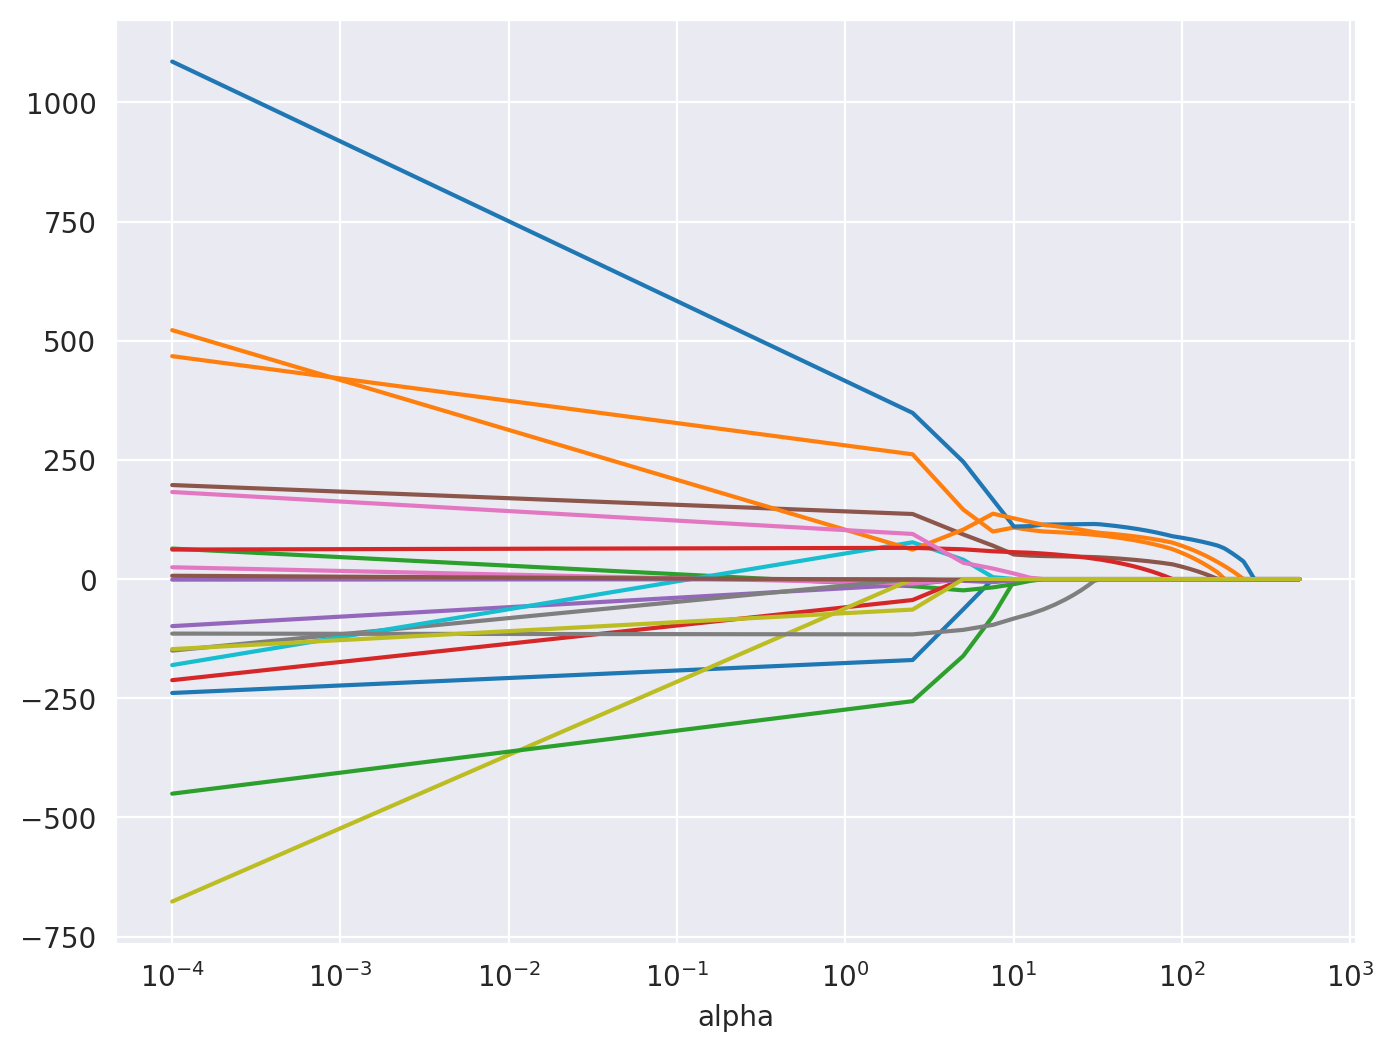

In [ ]:
show_me_plot(coefs)

0으로 수렴한다

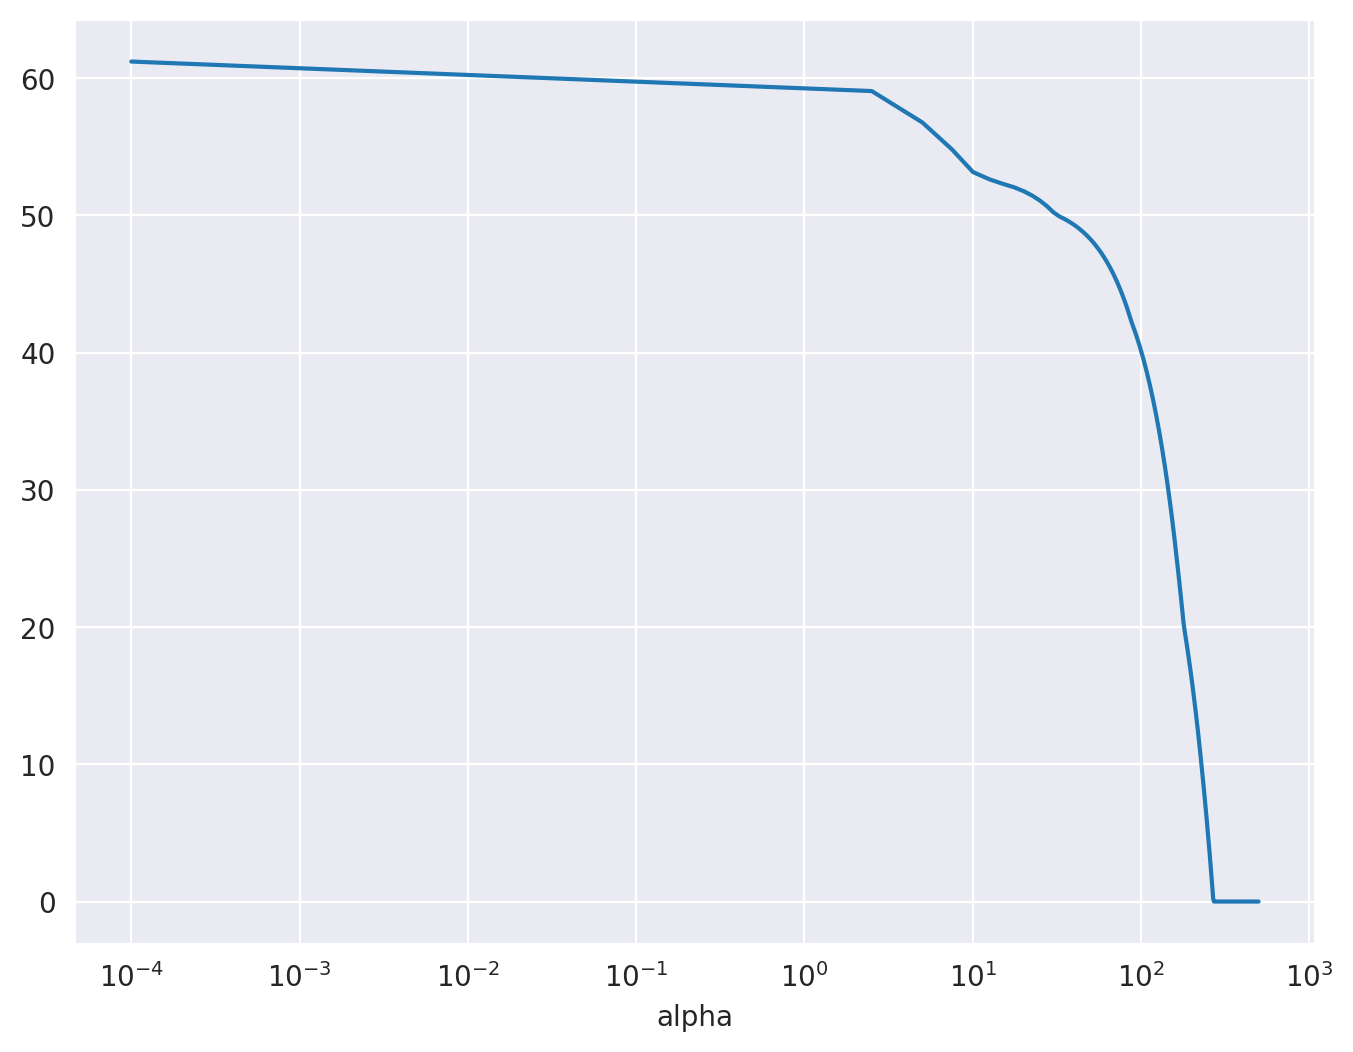

In [ ]:
show_me_plot(r2)

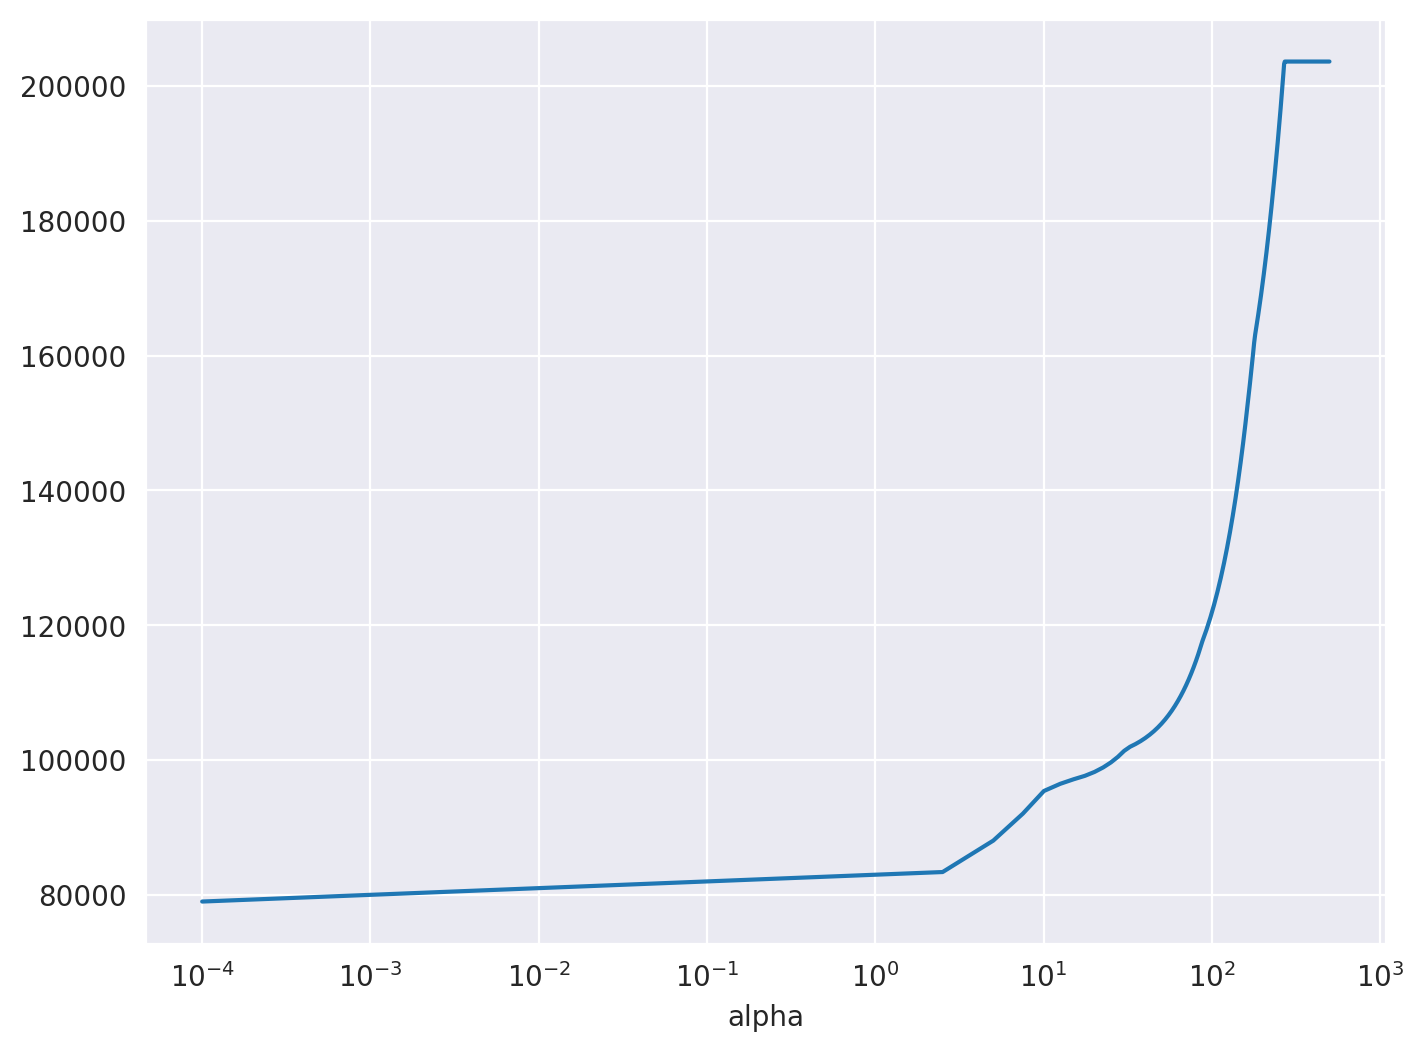

In [ ]:
show_me_plot(mse)

###Lasso with optimal alpha

In [ ]:
from sklearn.linear_model import LassoCV

#Lasso with 5 fold cross-validation
model = LassoCV(cv=5, random_state=0, max_iter=10000)

# Fit model
model.fit(X_train, y_train)

LassoCV(cv=5, max_iter=10000, random_state=0)

In [ ]:
model.alpha_

2.3441244939374584

In [ ]:
# Set best alpha
lasso_best = Lasso(alpha=model.alpha_)
lasso_best.fit(X_train, y_train)

Lasso(alpha=2.3441244939374584)

In [ ]:
pd.DataFrame(lasso_best.coef_.flatten(), columns=["Coefficient"], index=X.columns)

Coefficient
AtBat        -176.453097
Hits          271.233333
HmRun         -13.049492
Runs          -48.978784
RBI           -13.836964
Walks         140.128964
Years         -10.616534
CAtBat         -0.000000
CHits           0.000000
CHmRun         78.657813
CRuns         355.661881
CRBI           60.505483
CWalks       -262.751235
PutOuts        65.615874
Assists        -0.145053
Errors         -1.229316
League_N       99.661127
Division_W   -116.864056
NewLeague_N   -69.874977

In [ ]:
print('R squared training set', round(lasso_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(lasso_best.score(X_test, y_test)*100, 2))

R squared training set 59.18
R squared test set 35.48


In [ ]:
mean_squared_error(y_test, lasso_best.predict(X_test))

129468.59746481004

##Ridge

###α = 1

In [ ]:
reg = Ridge(alpha=1)
reg.fit(X_train, y_train)

Ridge(alpha=1)

In [ ]:
print('R squared training set', round(reg.score(X_train, y_train)*100, 2))
print('R squared test set', round(reg.score(X_test, y_test)*100, 2))

R squared training set 60.12
R squared test set 33.91


In [ ]:
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

pred = reg.predict(X_test)
mse_test = mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

MSE training set 81206.2
MSE test set 132611.04


### Let's change alpha!

In [ ]:
alphas = np.linspace(0.0001, 500, 200)  #generates an array of 200 evenly spaced values within the range from 0.0001 to 500
ridge = Ridge(max_iter=10000)
coefs = []
r2 = []
mse = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    r2.append(ridge.score(X_train, y_train)*100)
    pred_train = ridge.predict(X_train)
    mse_train = mean_squared_error(y_train, pred_train)
    mse.append(mse_train)

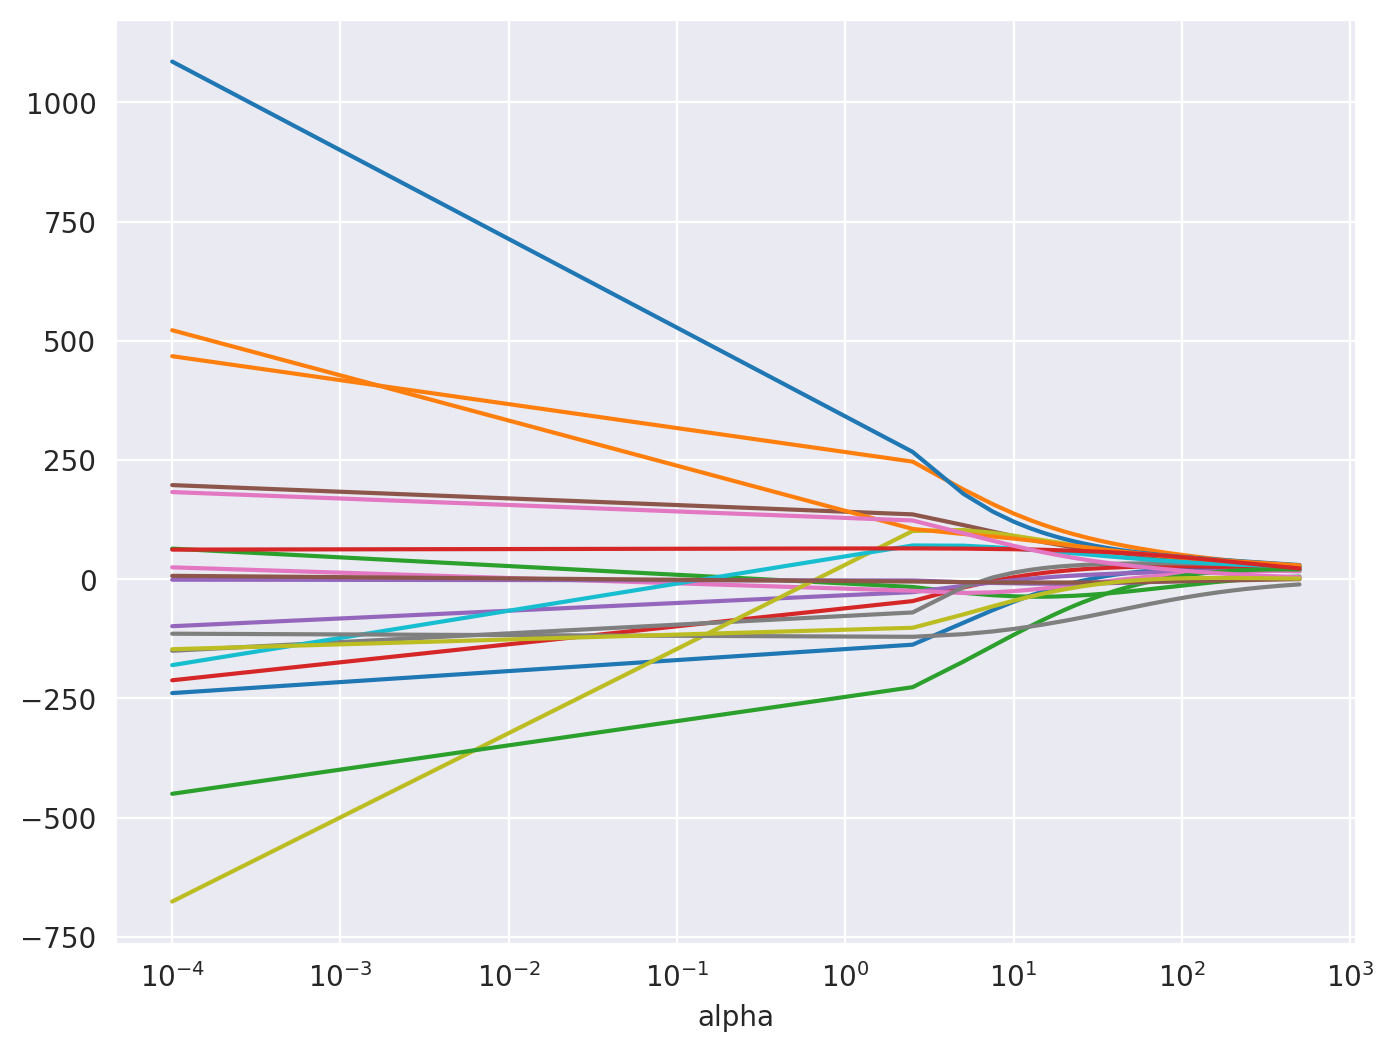

In [ ]:
show_me_plot(coefs)

0에 가까워지지만, 0으로 수렴하지 않는다.

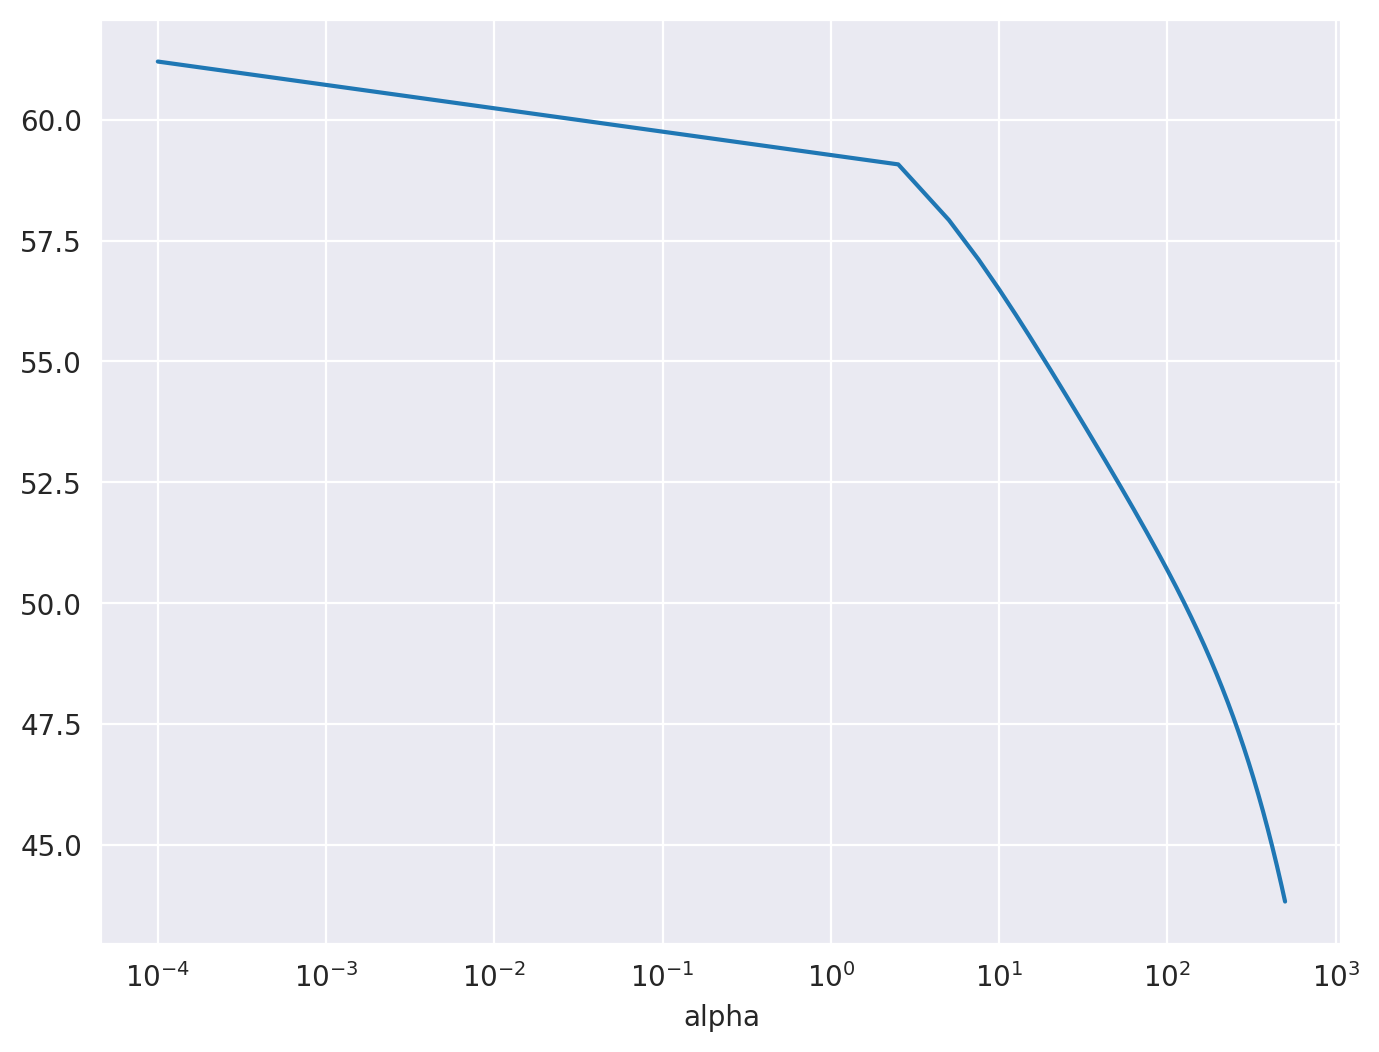

In [ ]:
show_me_plot(r2)

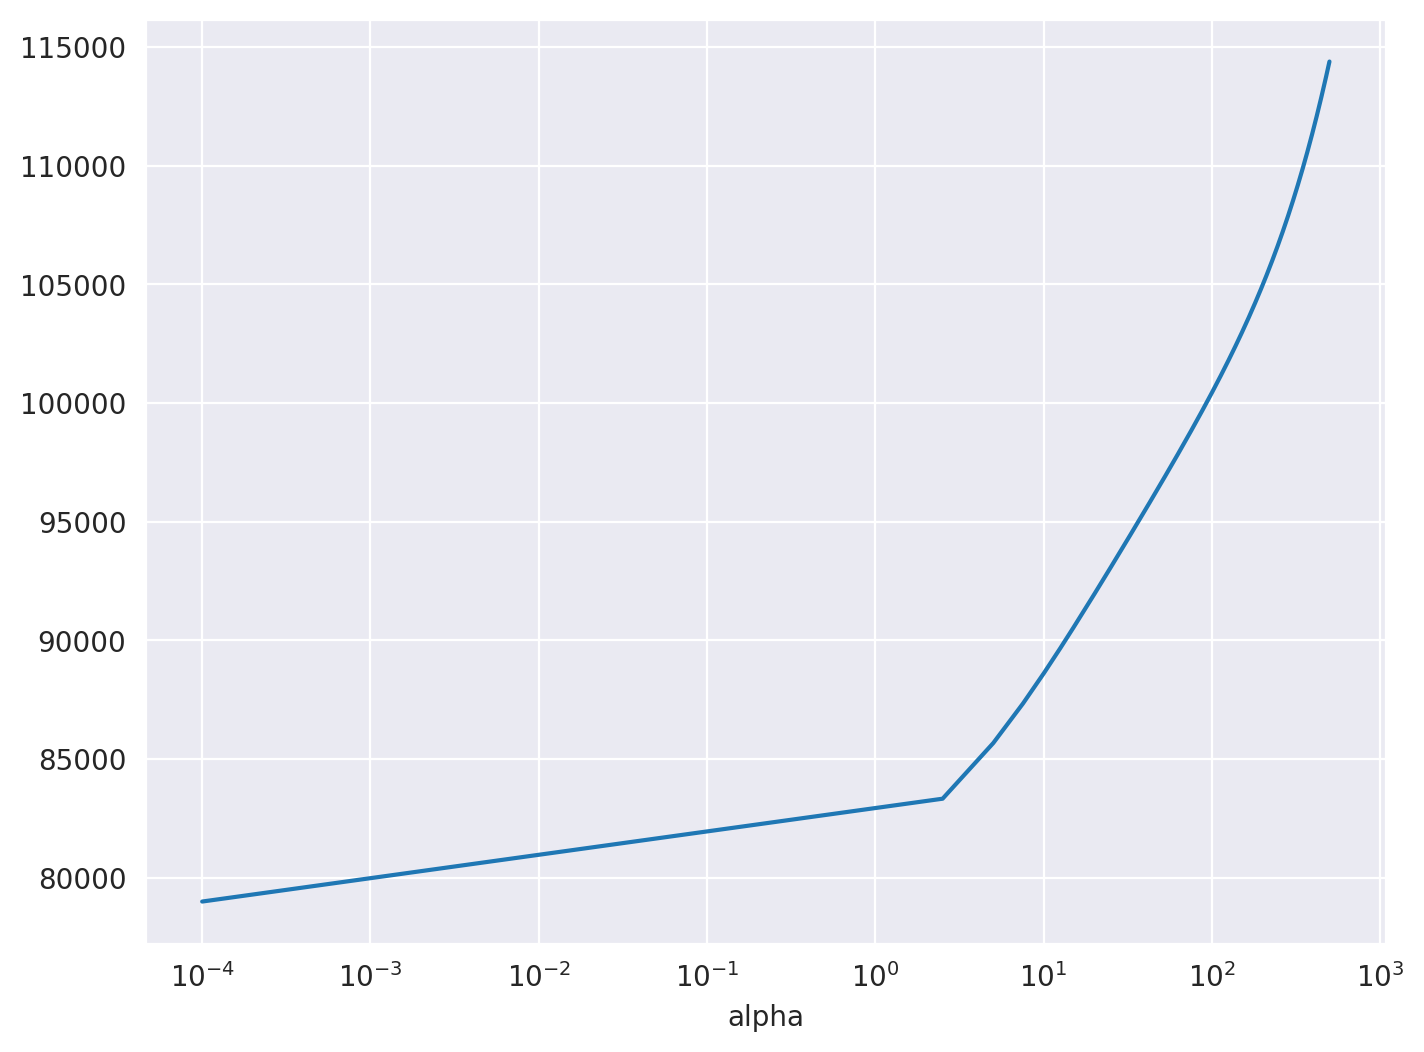

In [ ]:
show_me_plot(mse)

###Ridge with optimal alpha

In [ ]:
from sklearn.linear_model import RidgeCV

#Ridge with 5 fold cross-validation
model = RidgeCV(cv=5)

# Fit model
model.fit(X_train, y_train)

RidgeCV(cv=5)

In [ ]:
model.alpha_

10.0

In [ ]:
# Set best alpha
ridge_best = Ridge(alpha=model.alpha_)
ridge_best.fit(X_train, y_train)

Ridge(alpha=10.0)

In [ ]:
pd.DataFrame(ridge_best.coef_.flatten(), columns=["Coefficient"], index=X.columns)

Coefficient
AtBat         -47.437631
Hits          137.754813
HmRun         -35.905635
Runs            4.104297
RBI            -2.262645
Walks          90.248862
Years         -25.152308
CAtBat         13.578891
CHits          91.227602
CHmRun         64.272393
CRuns         120.712979
CRBI           85.156975
CWalks       -116.895076
PutOuts        62.803799
Assists        -8.867642
Errors         -6.980351
League_N       70.026657
Division_W   -104.403371
NewLeague_N   -45.244703

In [ ]:
print('R squared training set', round(ridge_best.score(X_train, y_train)*100, 2))
print('R squared test set', round(ridge_best.score(X_test, y_test)*100, 2))

R squared training set 56.49
R squared test set 36.15


In [ ]:
mean_squared_error(y_test, ridge_best.predict(X_test))

128126.3632785983